<img style="float: left; padding-right: 20px; width: 130px" src="https://research-data.urosario.edu.co/resources/images/UR-Logo.png"> <br> 
# Municicpios PDET
## ¿Y las Mujeres?

<b> Universidad del Rosario <br>

**Nombre**: Jessica Lorena Avellaneda Gómez <br>
**Correo electrónico**: jessica.avellaneda@urosario.edu.co <br>

In [1]:
# Importar librerías
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
from bs4 import BeautifulSoup
import nltk

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18992\204200964.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
file = "PDET.xlsx"
iniciativas = pd.read_excel(file)
iniciativas.tail()

Subregion Departamento Municipio/SujetoConcertacion  CodigoDane  \
31625  URABÁ ANTIOQUEÑO    ANTIOQUIA                        TURBO      5837.0   
31626  URABÁ ANTIOQUEÑO    ANTIOQUIA                        TURBO      5837.0   
31627  URABÁ ANTIOQUEÑO    ANTIOQUIA                        TURBO      5837.0   
31628  URABÁ ANTIOQUEÑO    ANTIOQUIA                        TURBO      5837.0   
31629  URABÁ ANTIOQUEÑO    ANTIOQUIA                        TURBO      5837.0   

                 Fase  CodigoIniciativa  \
31625  Fase Municipal     1605837222697   
31626  Fase Municipal     1605837220234   
31627  Fase Municipal     1605837223735   
31628  Fase Municipal     1605837222649   
31629  Fase Municipal     1605837223024   

                                        TituloIniciativa  \
31625  Monumento en memoria de las víctimas del confl...   
31626  Implementar por parte del estado los procesos ...   
31627  Reparación vía administrativa a todas las víct...   
31628  Realizar jornadas de atención integral y repar...   
31629  Apoyar la implementación del Sistema Integral ...   

                                   DescripcionIniciativa  \
31625  Diseño y concertación de la construcción de un...   
31626  Iniciar por parte de las instituciones del est...   
31627  Fortalecimiento económico a la Unidad para las...   
31628  Realización de jornadas de atención integral y...   
31629  Apoyar la implementación del sistema integral ...   

                                                   PILAR  \
31625  8 - RECONCILIACIÓN, CONVIVENCIA Y CONSTRUCCIÓN...   
31626  8 - RECONCILIACIÓN, CONVIVENCIA Y CONSTRUCCIÓN...   
31627  8 - RECONCILIACIÓN, CONVIVENCIA Y CONSTRUCCIÓN...   
31628  8 - RECONCILIACIÓN, CONVIVENCIA Y CONSTRUCCIÓN...   
31629  8 - RECONCILIACIÓN, CONVIVENCIA Y CONSTRUCCIÓN...   

                                         Estrategia  \
31625  VERDAD, JUSTICIA, REPARACIÓN Y NO REPETICIÓN   
31626  VERDAD, JUSTICIA, REPARACIÓN Y NO REPETICIÓN   
31627  VERDAD, JUSTICIA, REPARACIÓN Y NO REPETICIÓN   
31628  VERDAD, JUSTICIA, REPARACIÓN Y NO REPETICIÓN   
31629  VERDAD, JUSTICIA, REPARACIÓN Y NO REPETICIÓN   

                                               Categoría  
31625  PROGRAMAS DE FORMACIÓN PARA LA PARTICIPACIÓN D...  
31626  FORMULACIÓN O ACTUALIZACIÓN DE PLANES DE REPAR...  
31627  FORMULACIÓN O ACTUALIZACIÓN DE PLANES DE REPAR...  
31628  FORMULACIÓN O ACTUALIZACIÓN DE PLANES DE REPAR...  
31629  PROGRAMAS DE FORMACIÓN PARA LA PARTICIPACIÓN D...

In [3]:
iniciativas.shape[0] #Contar la cantidad de observaciones

31630

In [4]:
iniciativas.isna() #Miro si hay vacios en mis datos

Subregion  Departamento  Municipio/SujetoConcertacion  CodigoDane  \
0          False         False                         False       False   
1          False         False                         False       False   
2          False         False                         False       False   
3          False         False                         False       False   
4          False         False                         False       False   
...          ...           ...                           ...         ...   
31625      False         False                         False       False   
31626      False         False                         False       False   
31627      False         False                         False       False   
31628      False         False                         False       False   
31629      False         False                         False       False   

        Fase  CodigoIniciativa  TituloIniciativa  DescripcionIniciativa  \
0      False             False             False                  False   
1      False             False             False                  False   
2      False             False             False                  False   
3      False             False             False                  False   
4      False             False             False                  False   
...      ...               ...               ...                    ...   
31625  False             False             False                  False   
31626  False             False             False                  False   
31627  False             False             False                  False   
31628  False             False             False                  False   
31629  False             False             False                  False   

       PILAR  Estrategia  Categoría  
0      False       False      False  
1      False       False      False  
2      False       False      False  
3      False       False      False  
4      False       False      False  
...      ...         ...        ...  
31625  False       False      False  
31626  False       False      False  
31627  False       False      False  
31628  False       False      False  
31629  False       False      False  

[31630 rows x 11 columns]

In [5]:
# Obtener las subregiones únicas
subregiones = iniciativas['Subregion'].unique()

# Mostrar las subregiones
print(subregiones)

['ALTO PATÍA Y NORTE DEL CAUCA' 'ARAUCA'
 'BAJO CAUCA Y NORDESTE ANTIOQUEÑO' 'CATATUMBO' 'CHOCÓ'
 'CUENCA DEL CAGUÁN Y PIEDEMONTE CAQUETEÑO' 'MACARENA GUAVIARE'
 'MONTES DE MARÍA' 'PACÍFICO MEDIO' 'PACÍFICO Y FRONTERA NARIÑENSE'
 'PUTUMAYO' 'SIERRA NEVADA-PERIJÁ-ZONA BANANERA' 'SUR DE BOLÍVAR'
 'SUR DE CÓRDOBA' 'SUR DEL TOLIMA' 'URABÁ ANTIOQUEÑO']


In [6]:
# Obtener los municipios por subregión
municipios_por_subregion = iniciativas.groupby('Subregion')['Municipio/SujetoConcertacion'].unique()

# Mostrar los municipios por subregión
for subregion, municipios in municipios_por_subregion.items():
    print(f'Subregión: {subregion}')
    print('Municipios:')
    for municipio in municipios:
        print(f'- {municipio}')
    print()

Subregión: ALTO PATÍA Y NORTE DEL CAUCA
Municipios:
- ARGELIA
- BALBOA
- BUENOS AIRES
- CAJIBÍO
- CALDONO
- CALOTO
- CORINTO
- EL TAMBO
- JAMBALÓ
- MERCADERES
- MIRANDA
- MORALES
- PATÍA
- PIENDAMÓ
- SANTANDER DE QUILICHAO
- SUÁREZ
- TORIBIO
- CUMBITARA
- EL ROSARIO
- LEIVA
- LOS ANDES
- POLICARPA
- FLORIDA
- PRADERA

Subregión: ARAUCA
Municipios:
- ARAUQUITA
- FORTUL
- SARAVENA
- TAME

Subregión: BAJO CAUCA Y NORDESTE ANTIOQUEÑO
Municipios:
- AMALFI
- ANORÍ
- BRICEÑO
- CÁCERES
- CAUCASIA
- EL BAGRE
- ITUANGO
- NECHÍ
- REMEDIOS
- SEGOVIA
- TARAZÁ
- VALDIVIA
- ZARAGOZA

Subregión: CATATUMBO
Municipios:
- CATALAURA BARÍ
- CONVENCIÓN
- EL CARMEN
- EL TARRA
- HACARÍ
- MOTILÓN BARÍ
- SAN CALIXTO
- SARDINATA
- TEORAMA
- TIBÚ

Subregión: CHOCÓ
Municipios:
- MURINDÓ
- VIGÍA DEL FUERTE
- ACANDÍ
- BOJAYA
- CARMEN DEL DARIEN
- CONDOTO
- EL LITORAL DEL SAN JUAN
- ISTMINA
- MEDIO ATRATO
- MEDIO SAN JUAN
- NÓVITA
- RIOSUCIO
- SIPÍ
- UNGUÍA

Subregión: CUENCA DEL CAGUÁN Y PIEDEMONTE CAQUETEÑO
Municip

In [7]:

# Crear un DataFrame separado para cada subregión
for subregion in subregiones:
    # Filtrar los datos para la subregión actual
    df_subregion = iniciativas[iniciativas['Subregion'] == subregion]
    
    # Obtener el nombre del municipio (subregión) en minúsculas
    nombre_municipio = subregion.lower().replace(' ', '_')
    
    # Crear el nuevo DataFrame con el nombre del municipio en minúsculas
    globals()[nombre_municipio] = df_subregion
    
    # Mostrar los primeros registros del nuevo DataFrame
    print(nombre_municipio + '.head():')
    print(globals()[nombre_municipio].head())
    print('\n')

alto_patía_y_norte_del_cauca.head():
                      Subregion Departamento Municipio/SujetoConcertacion  \
0  ALTO PATÍA Y NORTE DEL CAUCA        CAUCA                      ARGELIA   
1  ALTO PATÍA Y NORTE DEL CAUCA        CAUCA                      ARGELIA   
2  ALTO PATÍA Y NORTE DEL CAUCA        CAUCA                      ARGELIA   
3  ALTO PATÍA Y NORTE DEL CAUCA        CAUCA                      ARGELIA   
4  ALTO PATÍA Y NORTE DEL CAUCA        CAUCA                      ARGELIA   

   CodigoDane            Fase  CodigoIniciativa  \
0     19050.0  Fase Municipal      119050289276   
1     19050.0  Fase Municipal      119050290967   
2     19050.0  Fase Municipal      119050290973   
3     19050.0  Fase Municipal      119050290975   
4     19050.0  Fase Municipal      119050290972   

                                    TituloIniciativa  \
0  Gestionar ante la Agencia Nacional de Tierras ...   
1  Implementar un programa de subsidios integrale...   
2  Facilitar el  acceso a

In [8]:
# Limpiar y normalizar los valores en la columna 'Subregion'
iniciativas['Subregion'] = iniciativas['Subregion'].str.strip().str.upper()

# Obtener las subregiones únicas
subregiones_unicas = iniciativas['Subregion'].unique()

# Crear un diccionario para almacenar los DataFrames por subregión
dataframes_subregion = {}

# Iterar sobre las subregiones únicas
for subregion in subregiones_unicas:
    # Filtrar los datos para la subregión actual
    df_subregion = iniciativas[iniciativas['Subregion'] == subregion]
    
    # Agregar el DataFrame de la subregión al diccionario
    dataframes_subregion[subregion] = df_subregion

# Acceder a cada DataFrame por subregión y mostrar los primeros registros
for subregion, dataframe in dataframes_subregion.items():
    print(f"Subregión: {subregion}")
    print(dataframe.head())
    print("\n")

Subregión: ALTO PATÍA Y NORTE DEL CAUCA
                      Subregion Departamento Municipio/SujetoConcertacion  \
0  ALTO PATÍA Y NORTE DEL CAUCA        CAUCA                      ARGELIA   
1  ALTO PATÍA Y NORTE DEL CAUCA        CAUCA                      ARGELIA   
2  ALTO PATÍA Y NORTE DEL CAUCA        CAUCA                      ARGELIA   
3  ALTO PATÍA Y NORTE DEL CAUCA        CAUCA                      ARGELIA   
4  ALTO PATÍA Y NORTE DEL CAUCA        CAUCA                      ARGELIA   

   CodigoDane            Fase  CodigoIniciativa  \
0     19050.0  Fase Municipal      119050289276   
1     19050.0  Fase Municipal      119050290967   
2     19050.0  Fase Municipal      119050290973   
3     19050.0  Fase Municipal      119050290975   
4     19050.0  Fase Municipal      119050290972   

                                    TituloIniciativa  \
0  Gestionar ante la Agencia Nacional de Tierras ...   
1  Implementar un programa de subsidios integrale...   
2  Facilitar el  acces

In [9]:
# Acceder al DataFrame de la subregión
df_alto_paita_y_norte_del_cauca = dataframes_subregion['ALTO PATÍA Y NORTE DEL CAUCA']
df_arauca = dataframes_subregion['ARAUCA']
df_cuenca_del_caguan_y_piedemonte_caqueteno = dataframes_subregion['CUENCA DEL CAGUÁN Y PIEDEMONTE CAQUETEÑO']
df_macarena_guaviare = dataframes_subregion['MACARENA GUAVIARE']
df_montes_de_maria = dataframes_subregion['MONTES DE MARÍA']
df_pacifico_medio = dataframes_subregion['PACÍFICO MEDIO']
df_pacifico_y_frontera_narinense = dataframes_subregion['PACÍFICO Y FRONTERA NARIÑENSE']
df_putumayo = dataframes_subregion['PUTUMAYO']
df_sierra_nevada_perija_zona_bananera = dataframes_subregion['SIERRA NEVADA-PERIJÁ-ZONA BANANERA']
df_sur_de_bolivar = dataframes_subregion['SUR DE BOLÍVAR']
df_sur_de_cordoba = dataframes_subregion['SUR DE CÓRDOBA']
df_sur_del_tolima = dataframes_subregion['SUR DEL TOLIMA']
df_uraba_antioqueno = dataframes_subregion['URABÁ ANTIOQUEÑO']

# Mostrar los primeros registros del DataFrame "ALTO PATÍA Y NORTE DEL CAUCA"
df_alto_paita_y_norte_del_cauca.head()

Subregion Departamento Municipio/SujetoConcertacion  \
0  ALTO PATÍA Y NORTE DEL CAUCA        CAUCA                      ARGELIA   
1  ALTO PATÍA Y NORTE DEL CAUCA        CAUCA                      ARGELIA   
2  ALTO PATÍA Y NORTE DEL CAUCA        CAUCA                      ARGELIA   
3  ALTO PATÍA Y NORTE DEL CAUCA        CAUCA                      ARGELIA   
4  ALTO PATÍA Y NORTE DEL CAUCA        CAUCA                      ARGELIA   

   CodigoDane            Fase  CodigoIniciativa  \
0     19050.0  Fase Municipal      119050289276   
1     19050.0  Fase Municipal      119050290967   
2     19050.0  Fase Municipal      119050290973   
3     19050.0  Fase Municipal      119050290975   
4     19050.0  Fase Municipal      119050290972   

                                    TituloIniciativa  \
0  Gestionar ante la Agencia Nacional de Tierras ...   
1  Implementar un programa de subsidios integrale...   
2  Facilitar el  acceso a  las lineas de créditos...   
3  Actualizar el mapa político-administrativo del...   
4  Establecer por única vez acuerdo por medio del...   

                               DescripcionIniciativa  \
0  Gestionar ante la Agencia Nacional de Tierras ...   
1  Lograr la democratización de la tierra, en ben...   
2  Lograr la democratización de la tierra, en ben...   
3  Contribuir a la regularización y protección de...   
4  Contribuir a la regularización y protección de...   

                                               PILAR  \
0  1 - ORDENAMIENTO SOCIAL DE LA PROPIEDAD RURAL ...   
1  1 - ORDENAMIENTO SOCIAL DE LA PROPIEDAD RURAL ...   
2  1 - ORDENAMIENTO SOCIAL DE LA PROPIEDAD RURAL ...   
3  1 - ORDENAMIENTO SOCIAL DE LA PROPIEDAD RURAL ...   
4  1 - ORDENAMIENTO SOCIAL DE LA PROPIEDAD RURAL ...   

                                          Estrategia  \
0                                 ACCESO A LA TIERRA   
1                                 ACCESO A LA TIERRA   
2                                 ACCESO A LA TIERRA   
3  ADMINISTRACIÓN, USO DEL SUELO Y  GESTIÓN CATAS...   
4  ADMINISTRACIÓN, USO DEL SUELO Y  GESTIÓN CATAS...   

                                           Categoría  
0  FONDO DE TIERRAS - COMPRA, EXTINCIÓN DE DOMINI...  
1                    SUBSIDIOS INTEGRALES DE TIERRAS  
2                                 CRÉDITO DE TIERRAS  
3  FORMULACIÓN Y/O ACTUALIZACIÓN DEL EOT, PBOT Y POT  
4            GENERACIÓN Y ACTUALIZACIÓN DEL CATASTRO

In [10]:
# Crear un diccionario para almacenar los objetos nltk.text.Text
textos = {}

# Iterar sobre cada data frame y convertirlo en texto
for nombre, data_frame in dataframes_subregion.items():
    # Obtener el texto del DataFrame como una sola cadena
    texto_completo = ' '.join(data_frame[['DescripcionIniciativa', 'PILAR', 'Estrategia']].values.flatten().astype(str))
    
    # Tokenizar el texto
    tokens = nltk.word_tokenize(texto_completo)
    
    # Crear el objeto nltk.text.Text y almacenarlo en el diccionario
    textos[nombre] = nltk.Text(tokens)

In [11]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def clean_text(text):
    # Convertir el texto a minúsculas
    text = text.lower()
    
    # Remover números
    text = re.sub(r'\d+', '', text)
    
    # Remover signos de puntuación y caracteres especiales
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenizar el texto en palabras individuales
    tokens = word_tokenize(text, language='spanish')
    
    # Eliminar las stopwords (palabras comunes sin significado)
    stop_words = set(stopwords.words('spanish'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Unir las palabras filtradas en un solo texto
    cleaned_text = ' '.join(filtered_tokens)
    
    return cleaned_text

In [12]:
#cleaned_texts = [clean_text(text) for text in textos['ALTO PATÍA Y NORTE DEL CAUCA']]

In [13]:
cleaned_texts = {}  # Diccionario para almacenar los textos limpios de todas las subregiones

# Recorrer cada subregión
for subregion, text_list in textos.items():
    cleaned_texts[subregion] = [clean_text(text) for text in text_list]

# Acceder al texto limpio de una subregión específica
textos_limpios_alto_paita = cleaned_texts['ALTO PATÍA Y NORTE DEL CAUCA']

In [14]:
textos_limpios_alto_paita

['gestionar',
 '',
 '',
 'agencia',
 'nacional',
 '',
 'tierras',
 '',
 'ant',
 '',
 '',
 'registro',
 '',
 '',
 'sujetos',
 '',
 'ordenamiento',
 'social',
 '',
 '',
 'propiedad',
 'rural',
 '',
 'reso',
 '',
 '',
 'registro',
 '',
 '',
 'inmuebles',
 'rurales',
 'rir',
 '',
 '',
 'establecer',
 '',
 'escenario',
 'técnico',
 '',
 'permita',
 'viabilizar',
 'pactos',
 '',
 '',
 'comunidades',
 'campesinas',
 '',
 'suplir',
 '',
 'oferta',
 '',
 'demanda',
 '',
 'tierras',
 '',
 '',
 'marco',
 '',
 'decreto',
 'ley',
 '',
 '',
 '',
 '',
 '',
 'artículo',
 '',
 '',
 '',
 'permitan',
 'sustentar',
 '',
 'potencial',
 'compra',
 '',
 'adjudicación',
 '',
 'tierras',
 '',
 '',
 'municipio',
 '',
 'argelia',
 'cauca',
 '',
 '',
 'acuerdo',
 '',
 '',
 'disponibilidad',
 '',
 'oferta',
 '',
 'fondo',
 '',
 'tierras',
 'establecido',
 '',
 '',
 'reforma',
 'rural',
 'integral',
 '',
 'empleando',
 '',
 '',
 'necesario',
 '',
 'mesa',
 '',
 'dialogo',
 '',
 'concertación',
 'municipal',
 '',
 '

In [15]:
# Acceder al texto limpio de cada subregión específica
textos_limpios_arauca = cleaned_texts['ARAUCA']
textos_limpios_cuenca_del_caguan_y_piedemonte_caqueteno = cleaned_texts['CUENCA DEL CAGUÁN Y PIEDEMONTE CAQUETEÑO']
textos_limpios_macarena_guaviare = cleaned_texts['MACARENA GUAVIARE']
textos_limpios_montes_de_maria = cleaned_texts['MONTES DE MARÍA']
textos_limpios_pacifico_medio = cleaned_texts['PACÍFICO MEDIO']
textos_limpios_pacifico_y_frontera_narinense = cleaned_texts['PACÍFICO Y FRONTERA NARIÑENSE']
textos_limpios_putumayo = cleaned_texts['PUTUMAYO']
textos_limpios_sierra_nevada_perija_zona_bananera = cleaned_texts['SIERRA NEVADA-PERIJÁ-ZONA BANANERA']
textos_limpios_sur_de_bolivar = cleaned_texts['SUR DE BOLÍVAR']
textos_limpios_sur_de_cordoba = cleaned_texts['SUR DE CÓRDOBA']
textos_limpios_sur_del_tolima = cleaned_texts['SUR DEL TOLIMA']
textos_limpios_uraba_antioqueno = cleaned_texts['URABÁ ANTIOQUEÑO']

## Análisis para la Subregión de ALTO PATÍA Y NORTE DEL CAUCA

A continuación se presenta el análisis realizado para la Subregión de ALTO PATÍA Y NORTE DEL CAUCA, esto porqué es la Región más significativa

In [16]:
from nltk import FreqDist

# Obtener todas las palabras de las iniciativas limpias
all_words = [word.lower() for text in textos_limpios_alto_paita for word in text.split()]

# Calcular la frecuencia de las palabras
fdist = FreqDist(all_words)

# Obtener las palabras más frecuentes
most_common_words = fdist.most_common(20)  
print(most_common_words)

[('rural', 4902), ('municipio', 4254), ('construcción', 2097), ('educación', 1978), ('infraestructura', 1830), ('cauca', 1794), ('producción', 1565), ('salud', 1485), ('agropecuaria', 1343), ('san', 1340), ('primera', 1268), ('infancia', 1266), ('calidad', 1255), ('km', 1145), ('acceso', 1135), ('estudios', 1118), ('económica', 1095), ('reactivación', 1042), ('comunidades', 1026), ('realizar', 919)]


In [17]:
from nltk.text import Text

# Crear un objeto Text a partir de las iniciativas
corpus = Text(textos_limpios_alto_paita)

# Buscar concordancias de una palabra o frase específica
keyword = "mujeres"
concordances = corpus.concordance_list(keyword, lines=5)  

# Mostrar las concordancias encontradas
for conc in concordances:
    print(conc.line)

era  impuesto predial priorizando   mujeres  argelia cauca   ordenamiento socia
tivas  empleo   propone priorizar   mujeres    ordenamiento social   propiedad 
tierras   decreto     priorizando   mujeres   incluya  instalación  oficinas  n
istencia técnica  personas  hombre  mujeres   municipio  uso  mantenimiento sol
os  puestos  salud  especialmente   mujeres víctimas  conflicto   violencia  gé


In [18]:
from nltk.text import Text

# Crear un objeto Text a partir de las iniciativas
corpus = Text(textos_limpios_alto_paita)

# Buscar concordancias de una palabra o frase específica
keyword = "embarazo"
concordances = corpus.concordance_list(keyword, lines=5)  
# Mostrar las concordancias encontradas
for conc in concordances:
    print(conc.line)

s  trabajo especiales   mujeres    embarazo  lactancia  personas mayores  otor
 atención preferencial  integral   embarazo  posterior    implementar  estrate
dades    manera tener     reposo   embarazo   periodo correspondiente   licenc
ón    acompañantes  asi   mujeres  embarazo  requieran  cerca   red  prestació
 indice  deserción escolar  temas  embarazo temprano   adolescencia    educaci


In [19]:
from nltk.text import Text

# Crear un objeto Text a partir de las iniciativas
corpus = Text(textos_limpios_alto_paita)

# Buscar concordancias de una palabra o frase específica
keyword = "equidad"
concordances = corpus.concordance_list(keyword, lines=5)  


# Mostrar las concordancias encontradas
for conc in concordances:
    print(conc.line)

o  formación  capacitación  temas   equidad  género  trabajo comunitario  asoci
 primeros auxilios  medio ambiente  equidad  género  emprendimiento  formulació
ción  ejecución  recursos públicos  equidad  género    temas   promuevan  espac
endan  derechos   mujeres rurales   equidad  género   éste espacio  pretende co
r  puestos  atención  conciliación  equidad  pace   municipio  caloto  cauca  u


In [20]:
from nltk import ngrams

# Generar trígramas (n=3) que incluyan la palabra "género" y excluyan la palabra "enfoque"
trigrams = list(ngrams(all_words, 3))
trigrams_with_genre = [trigram for trigram in trigrams if 'género' in trigram and 'enfoque' not in trigram]

# Imprimir los primeros 10 trígramas con la palabra "género" y sin la palabra "enfoque"
for trigram in trigrams_with_genre[:10]:
    print(trigram)

('género', 'corregimientos', 'sectores')
('género', 'trece', 'corregimientos')
('conflicto', 'violencia', 'género')
('violencia', 'género', 'campesinos')
('género', 'campesinos', 'zonas')
('género', 'mujer', 'rural')
('género', 'inclusivas', 'producción')
('género', 'cuenta', 'vocación')
('temas', 'equidad', 'género')
('equidad', 'género', 'trabajo')


In [21]:
from nltk import pos_tag

# Etiquetar las palabras según su categoría gramatical
tagged_words = pos_tag(all_words)

# Filtrar palabras por categoría gramatical específica, como sustantivos (NN) o verbos (VB)
nouns = [word for word, tag in tagged_words if tag.startswith('N')]
verbs = [word for word, tag in tagged_words if tag.startswith('V')]

print(nouns[:10])  # Imprimir los primeros 10 sustantivos
print(verbs[:10])  # Imprimir los primeros 10 verbos

['gestionar', 'tierras', 'registro', 'sujetos', 'reso', 'registro', 'inmuebles', 'establecer', 'escenario', 'técnico']
['agencia', 'rurales', 'comunidades', 'marco', 'municipio', 'establecido', 'rurales', 'establecimiento', 'adquisición', 'tierra']


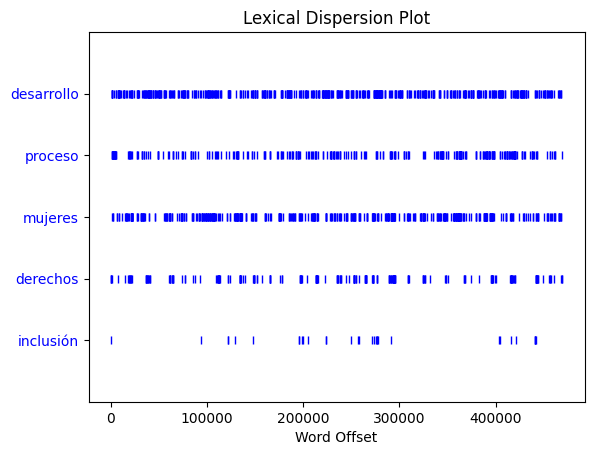

In [76]:
textos['ALTO PATÍA Y NORTE DEL CAUCA'].dispersion_plot(['desarrollo', 'proceso', 'mujeres', 'derechos', 'inclusión'])
# Mostrar la gráfica de dispersión
plt.show()

In [23]:
# Contar la frecuencia de la palabra "desarrollo" en el texto limpio
count = textos_limpios_alto_paita.count("mujeres")

# Imprimir el resultado
print("La palabra 'Mujeres' aparece:", count, "veces.")

La palabra 'Mujeres' aparece: 558 veces.


In [24]:
from nltk import bigrams

# Generar pares de palabras (bigramas) a partir del texto limpio
word_pairs = list(bigrams(all_words))

# Contar la frecuencia de la palabra "mujer" sin importar si está precedida o seguida por "hombre"
count = sum(1 for w1, w2 in word_pairs if (w1 == "mujer" and w2 != "hombre") or (w2 == "mujer" and w1 != "hombre"))

# Imprimir el resultado
print("La palabra 'mujer' sin importar si está precedida o seguida por 'hombre' aparece:", count, "veces.")

La palabra 'mujer' sin importar si está precedida o seguida por 'hombre' aparece: 248 veces.


In [25]:
from nltk.text import Text

# Crear un objeto Text a partir de las iniciativas
corpus = Text(textos_limpios_alto_paita)

# Buscar concordancias de una palabra o frase específica
keyword = "embarazo"
concordances = corpus.concordance_list(keyword, lines=5)  

# Mostrar las concordancias encontradas
for conc in concordances:
    print(conc.line)

s  trabajo especiales   mujeres    embarazo  lactancia  personas mayores  otor
 atención preferencial  integral   embarazo  posterior    implementar  estrate
dades    manera tener     reposo   embarazo   periodo correspondiente   licenc
ón    acompañantes  asi   mujeres  embarazo  requieran  cerca   red  prestació
 indice  deserción escolar  temas  embarazo temprano   adolescencia    educaci


In [26]:
from nltk.text import Text

# Crear un objeto Text a partir de las iniciativas
corpus = Text(textos_limpios_alto_paita)

# Buscar concordancias de una palabra o frase específica
keyword =  "género"
concordances = corpus.concordance_list(keyword, lines=5)  

# Mostrar las concordancias encontradas
for conc in concordances:
    print(conc.line)

ra   tierra insuficiente   enfoque  género     corregimientos  sectores  munic
 naturales  asociaciones   enfoque  género    trece corregimientos  sectores  
es víctimas  conflicto   violencia  género   campesinos   zonas  alejadas  pob
izando  acceso   derecho   enfoque  género mujer rural   permanencia     jóven
esariales preferiblemente  enfoque  género  inclusivas   producción agropecuar


In [27]:
from nltk.text import Text

# Crear un objeto Text a partir de las iniciativas
corpus = Text(textos_limpios_alto_paita)

# Buscar concordancias de una palabra o frase específica
keyword =  "reproductivos"
concordances = corpus.concordance_list(keyword, lines=5) 

# Mostrar las concordancias encontradas
for conc in concordances:
    print(conc.line)

capacitación  derechos sexuales  reproductivos  planificación familiar conserva
pectos  salud  derechos humanos  reproductivos  asociatividad  productividad  v
io   derechos humanos  sexuales  reproductivos   formación  competencias ciudad
io   derechos humanos  sexuales  reproductivos    relación      ambiente    for
olares praes  derechos sexuales  reproductivos  educación vial  educación finan


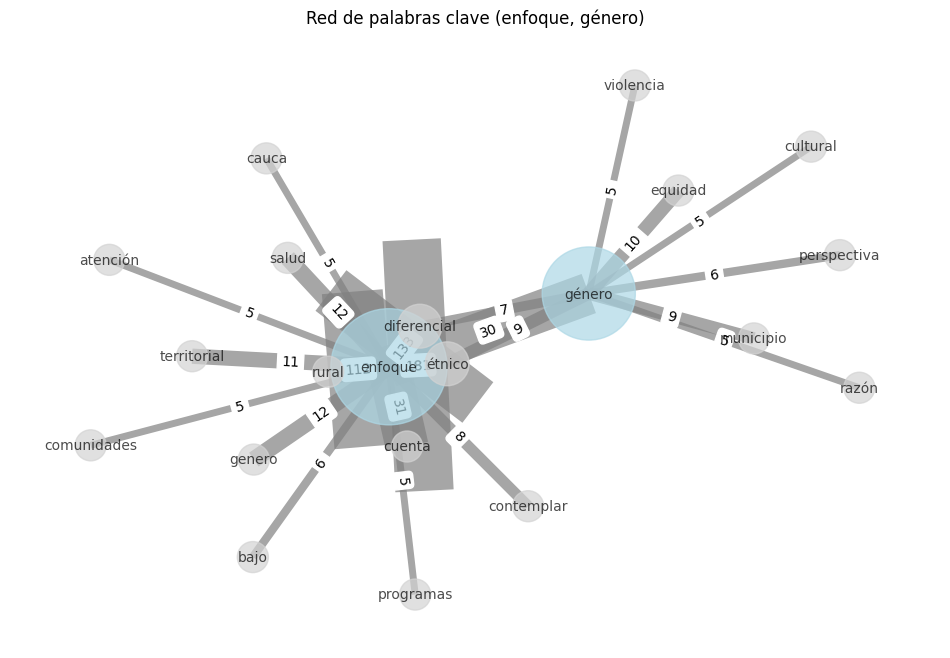

Nodo: enfoque - Centralidad de grado: 0.7000000000000001 - Centralidad de intermediación: 0.8105263157894737
Nodo: género - Centralidad de grado: 0.45 - Centralidad de intermediación: 0.6526315789473685
Nodo: étnico - Centralidad de grado: 0.1 - Centralidad de intermediación: 0.0
Nodo: diferencial - Centralidad de grado: 0.1 - Centralidad de intermediación: 0.0
Nodo: rural - Centralidad de grado: 0.05 - Centralidad de intermediación: 0.0
Nodo: violencia - Centralidad de grado: 0.05 - Centralidad de intermediación: 0.0
Nodo: cuenta - Centralidad de grado: 0.05 - Centralidad de intermediación: 0.0
Nodo: genero - Centralidad de grado: 0.05 - Centralidad de intermediación: 0.0
Nodo: equidad - Centralidad de grado: 0.05 - Centralidad de intermediación: 0.0
Nodo: territorial - Centralidad de grado: 0.05 - Centralidad de intermediación: 0.0


In [28]:
import networkx as nx
import matplotlib.pyplot as plt

# Definir las palabras clave
keywords = ["enfoque", "género"]

# Crear un grafo vacío
G = nx.Graph()

# Agregar los nodos al grafo con las palabras clave en el texto limpio
G.add_nodes_from(keywords)

# Obtener los bigramas en el texto limpio
bigrams = list(ngrams(all_words, 2))

# Contar la frecuencia de los bigramas que contienen las palabras clave
bigram_frequency = {}
for bigram in bigrams:
    if any(keyword in bigram for keyword in keywords):
        bigram_frequency[bigram] = bigram_frequency.get(bigram, 0) + 1

# Definir un umbral de frecuencia para filtrar los bigramas
threshold = 5

# Agregar los enlaces entre nodos para los bigramas que superen el umbral de frecuencia
for bigram, frequency in bigram_frequency.items():
    if frequency >= threshold:
        G.add_edge(bigram[0], bigram[1], weight=frequency)

# Obtener los nodos más relevantes según su grado y peso de conexión
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

# Seleccionar los nodos más centrales para mostrar en el grafo
most_central_nodes = sorted(degree_centrality, key=lambda x: (degree_centrality[x], betweenness_centrality[x]), reverse=True)[:10]

# Ajustar los parámetros visuales del grafo
node_size = [10000 * degree_centrality[node] for node in G.nodes]
node_color = ['lightblue' if node in keywords else 'lightgray' for node in G.nodes]

# Aumentar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Visualizar el grafo
pos = nx.spring_layout(G, seed=42)
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
labels = nx.get_edge_attributes(G, 'weight')

nx.draw_networkx(G, pos, with_labels=True, node_size=node_size, node_color=node_color, font_size=10, edge_color='gray', width=weights, alpha=0.7)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title('Red de palabras clave (enfoque, género)')
plt.axis('off')
plt.show()

# Mostrar los nodos más centrales
for node in most_central_nodes:
    print("Nodo:", node, "- Centralidad de grado:", degree_centrality[node], "- Centralidad de intermediación:", betweenness_centrality[node])

In [29]:
from nltk import ngrams

# Generar trígramas (n=3)
trigrams = list(ngrams(all_words, 3))

# Filtrar los trígramas que incluyan las palabras clave
trigrams_equidad_genero = [tri for tri in trigrams if "equidad" in tri and "género" in tri]

# Imprimir los resultados
print("Trígramas con 'equidad' y 'género':", trigrams_equidad_genero)

Trígramas con 'equidad' y 'género': [('temas', 'equidad', 'género'), ('equidad', 'género', 'trabajo'), ('ambiente', 'equidad', 'género'), ('equidad', 'género', 'emprendimiento'), ('públicos', 'equidad', 'género'), ('equidad', 'género', 'temas'), ('rurales', 'equidad', 'género'), ('equidad', 'género', 'éste'), ('política', 'equidad', 'género'), ('equidad', 'género', 'liderazgo'), ('rural', 'equidad', 'género'), ('equidad', 'género', 'piendamó'), ('pública', 'equidad', 'género'), ('equidad', 'género', 'incluyente'), ('sexuales', 'equidad', 'género'), ('equidad', 'género', 'prevención'), ('construcción', 'equidad', 'género'), ('equidad', 'género', 'enfoque'), ('humanos', 'equidad', 'género'), ('equidad', 'género', 'profundicen')]


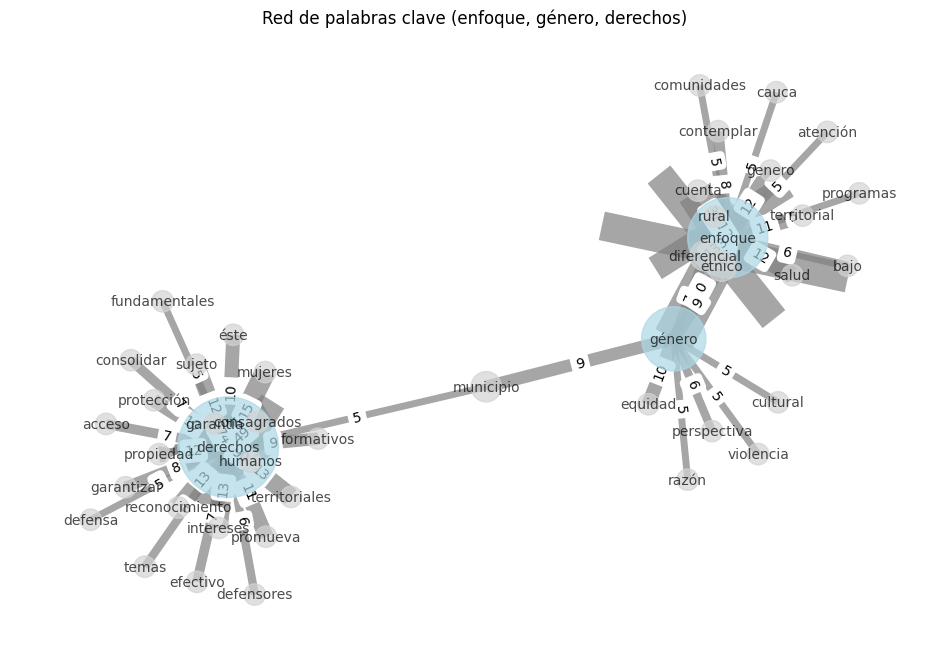

Nodo: derechos - Centralidad de grado: 0.5238095238095237 - Centralidad de intermediación: 0.7560975609756098
Nodo: enfoque - Centralidad de grado: 0.3333333333333333 - Centralidad de intermediación: 0.45993031358885017
Nodo: género - Centralidad de grado: 0.21428571428571427 - Centralidad de intermediación: 0.629500580720093
Nodo: municipio - Centralidad de grado: 0.047619047619047616 - Centralidad de intermediación: 0.5110336817653891
Nodo: étnico - Centralidad de grado: 0.047619047619047616 - Centralidad de intermediación: 0.0
Nodo: diferencial - Centralidad de grado: 0.047619047619047616 - Centralidad de intermediación: 0.0
Nodo: propiedad - Centralidad de grado: 0.023809523809523808 - Centralidad de intermediación: 0.0
Nodo: reconocimiento - Centralidad de grado: 0.023809523809523808 - Centralidad de intermediación: 0.0
Nodo: éste - Centralidad de grado: 0.023809523809523808 - Centralidad de intermediación: 0.0
Nodo: rural - Centralidad de grado: 0.023809523809523808 - Centralidad

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

# Definir las palabras clave
keywords = ["enfoque", "género", "derechos"]

# Crear un grafo vacío
G = nx.Graph()

# Agregar los nodos al grafo con las palabras clave en el texto limpio
G.add_nodes_from(keywords)

# Obtener los bigramas en el texto limpio
bigrams = list(ngrams(all_words, 2))

# Contar la frecuencia de los bigramas que contienen las palabras clave
bigram_frequency = {}
for bigram in bigrams:
    if any(keyword in bigram for keyword in keywords):
        bigram_frequency[bigram] = bigram_frequency.get(bigram, 0) + 1

# Definir un umbral de frecuencia para filtrar los bigramas
threshold = 5

# Agregar los enlaces entre nodos para los bigramas que superen el umbral de frecuencia
for bigram, frequency in bigram_frequency.items():
    if frequency >= threshold:
        G.add_edge(bigram[0], bigram[1], weight=frequency)

# Obtener los nodos más relevantes según su grado y peso de conexión
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

# Seleccionar los nodos más centrales para mostrar en el grafo
most_central_nodes = sorted(degree_centrality, key=lambda x: (degree_centrality[x], betweenness_centrality[x]), reverse=True)[:10]

# Ajustar los parámetros visuales del grafo
node_size = [10000 * degree_centrality[node] for node in G.nodes]
node_color = ['lightblue' if node in keywords else 'lightgray' for node in G.nodes]

# Aumentar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Visualizar el grafo
pos = nx.spring_layout(G, seed=42)
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
labels = nx.get_edge_attributes(G, 'weight')

nx.draw_networkx(G, pos, with_labels=True, node_size=node_size, node_color=node_color, font_size=10, edge_color='gray', width=weights, alpha=0.7)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title('Red de palabras clave (enfoque, género, derechos)')
plt.axis('off')
plt.show()

# Mostrar los nodos más centrales
for node in most_central_nodes:
    print("Nodo:", node, "- Centralidad de grado:", degree_centrality[node], "- Centralidad de intermediación:", betweenness_centrality[node])

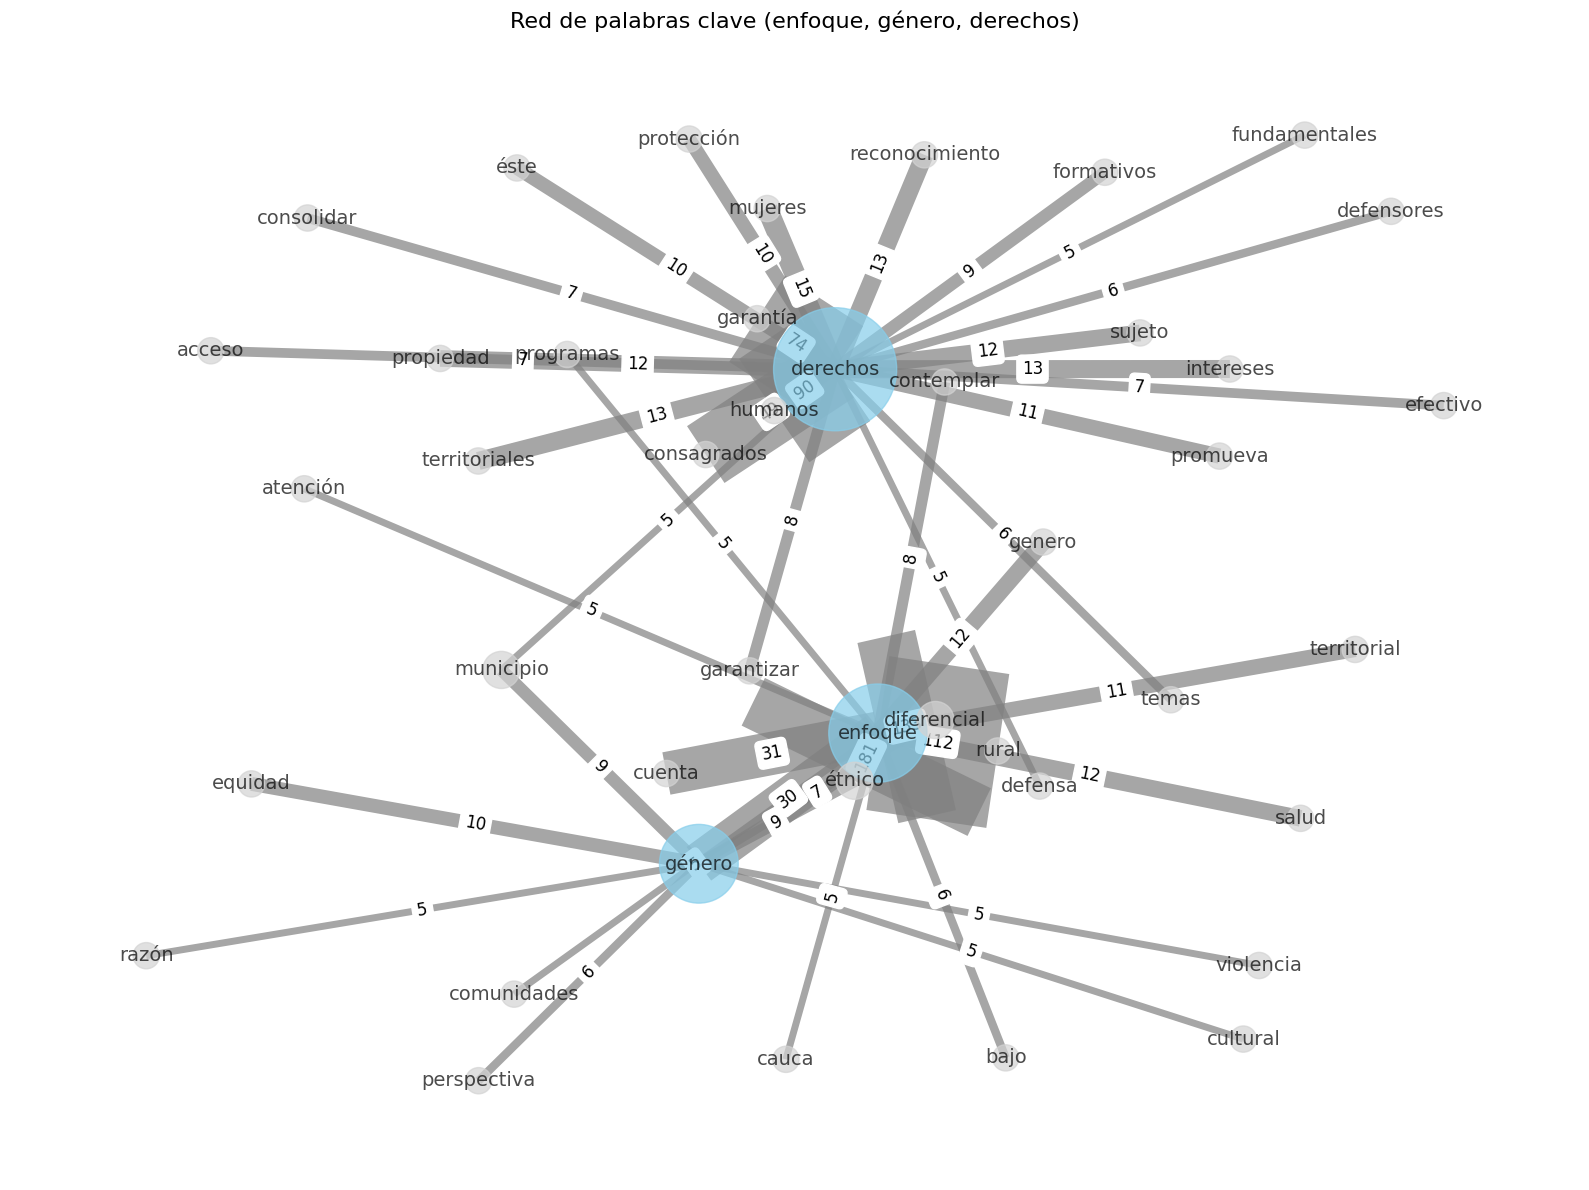

Nodo: derechos - Centralidad de grado: 0.5238095238095237 - Centralidad de intermediación: 0.7560975609756098
Nodo: enfoque - Centralidad de grado: 0.3333333333333333 - Centralidad de intermediación: 0.45993031358885017
Nodo: género - Centralidad de grado: 0.21428571428571427 - Centralidad de intermediación: 0.629500580720093
Nodo: municipio - Centralidad de grado: 0.047619047619047616 - Centralidad de intermediación: 0.5110336817653891
Nodo: étnico - Centralidad de grado: 0.047619047619047616 - Centralidad de intermediación: 0.0
Nodo: diferencial - Centralidad de grado: 0.047619047619047616 - Centralidad de intermediación: 0.0
Nodo: propiedad - Centralidad de grado: 0.023809523809523808 - Centralidad de intermediación: 0.0
Nodo: reconocimiento - Centralidad de grado: 0.023809523809523808 - Centralidad de intermediación: 0.0
Nodo: éste - Centralidad de grado: 0.023809523809523808 - Centralidad de intermediación: 0.0
Nodo: rural - Centralidad de grado: 0.023809523809523808 - Centralidad

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

# Definir las palabras clave
keywords = ["enfoque", "género", "derechos"]

# Crear un grafo vacío
G = nx.Graph()

# Agregar los nodos al grafo con las palabras clave en el texto limpio
G.add_nodes_from(keywords)

# Obtener los bigramas en el texto limpio
bigrams = list(ngrams(all_words, 2))

# Contar la frecuencia de los bigramas que contienen las palabras clave
bigram_frequency = {}
for bigram in bigrams:
    if any(keyword in bigram for keyword in keywords):
        bigram_frequency[bigram] = bigram_frequency.get(bigram, 0) + 1

# Definir un umbral de frecuencia para filtrar los bigramas
threshold = 5

# Agregar los enlaces entre nodos para los bigramas que superen el umbral de frecuencia
for bigram, frequency in bigram_frequency.items():
    if frequency >= threshold:
        G.add_edge(bigram[0], bigram[1], weight=frequency)

# Obtener los nodos más relevantes según su grado y peso de conexión
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

# Seleccionar los nodos más centrales para mostrar en el grafo
most_central_nodes = sorted(degree_centrality, key=lambda x: (degree_centrality[x], betweenness_centrality[x]), reverse=True)[:10]

# Ajustar los parámetros visuales del grafo
node_size = [15000 * degree_centrality[node] for node in G.nodes]
node_color = ['skyblue' if node in keywords else 'lightgray' for node in G.nodes]

# Aumentar el tamaño de la figura
plt.figure(figsize=(16, 12))

# Visualizar el grafo
pos = nx.spring_layout(G, seed=42, k=1.2)
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
labels = nx.get_edge_attributes(G, 'weight')

nx.draw_networkx(G, pos, with_labels=True, node_size=node_size, node_color=node_color, font_size=14, edge_color='gray', width=weights, alpha=0.7)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)

plt.title('Red de palabras clave (enfoque, género, derechos)', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# Mostrar los nodos más centrales
for node in most_central_nodes:
    print("Nodo:", node, "- Centralidad de grado:", degree_centrality[node], "- Centralidad de intermediación:", betweenness_centrality[node])

## Análisis para tiodas las subregiones.

A continuación se presenta el análisis mismo análisis realizado antes, pero para todas las subregiones

In [32]:
# Definir una lista de subregiones
subregiones = [
    'ALTO PATÍA Y NORTE DEL CAUCA',
    'ARAUCA',
    'CUENCA DEL CAGUÁN Y PIEDEMONTE CAQUETEÑO',
    'MACARENA GUAVIARE',
    'MONTES DE MARÍA',
    'PACÍFICO MEDIO',
    'PACÍFICO Y FRONTERA NARIÑENSE',
    'PUTUMAYO',
    'SIERRA NEVADA-PERIJÁ-ZONA BANANERA',
    'SUR DE BOLÍVAR',
    'SUR DE CÓRDOBA',
    'SUR DEL TOLIMA',
    'URABÁ ANTIOQUEÑO'
]

# Realizar el análisis de frecuencia de palabras para cada subregión
for subregion in subregiones:
    # Obtener los textos limpios de la subregión específica
    textos_limpios = cleaned_texts[subregion]
    
    # Obtener todas las palabras de los textos limpios
    all_words = [word.lower() for text in textos_limpios for word in text.split()]
    
    # Calcular la frecuencia de las palabras
    fdist = FreqDist(all_words)
    
    # Obtener las palabras más frecuentes
    most_common_words = fdist.most_common(20) 
    
    # Imprimir los resultados
    print("Subregión:", subregion)
    print("Palabras más frecuentes:", most_common_words)
    print()

Subregión: ALTO PATÍA Y NORTE DEL CAUCA
Palabras más frecuentes: [('rural', 4902), ('municipio', 4254), ('construcción', 2097), ('educación', 1978), ('infraestructura', 1830), ('cauca', 1794), ('producción', 1565), ('salud', 1485), ('agropecuaria', 1343), ('san', 1340), ('primera', 1268), ('infancia', 1266), ('calidad', 1255), ('km', 1145), ('acceso', 1135), ('estudios', 1118), ('económica', 1095), ('reactivación', 1042), ('comunidades', 1026), ('realizar', 919)]

Subregión: ARAUCA
Palabras más frecuentes: [('rural', 2250), ('municipio', 1723), ('infraestructura', 988), ('educación', 782), ('construcción', 727), ('agropecuaria', 556), ('arauquita', 540), ('infancia', 527), ('primera', 526), ('adecuación', 517), ('producción', 515), ('salud', 497), ('tierras', 470), ('económica', 451), ('reactivación', 448), ('tame', 416), ('paz', 403), ('fortul', 391), ('saravena', 390), ('acceso', 376)]

Subregión: CUENCA DEL CAGUÁN Y PIEDEMONTE CAQUETEÑO
Palabras más frecuentes: [('rural', 4486), ('m

In [33]:
import plotly.graph_objects as go

# Realizar el análisis de frecuencia de palabras para cada subregión
for subregion in subregiones:
    # Obtener los textos limpios de la subregión específica
    textos_limpios = cleaned_texts[subregion]
    
    # Obtener todas las palabras de los textos limpios
    all_words = [word.lower() for text in textos_limpios for word in text.split()]
    
    # Calcular la frecuencia de las palabras
    fdist = FreqDist(all_words)
    
    # Obtener las palabras más frecuentes y sus frecuencias
    most_common_words = fdist.most_common(10)  
    words, frequencies = zip(*most_common_words)
    
    # Crear el gráfico de barras interactivo con Plotly
    fig = go.Figure(data=[go.Bar(x=words, y=frequencies)])
    
    fig.update_layout(
        title=f'Palabras más frecuentes - {subregion}',
        xaxis_title='Palabras',
        yaxis_title='Frecuencia',
        xaxis_tickangle=-45,
        width=800,
        height=600
    )
    
    fig.show()

In [34]:
import plotly.graph_objects as go
from nltk import FreqDist

# Obtener todos los textos limpios de todas las subregiones
all_cleaned_texts = [text for subregion in cleaned_texts.values() for text in subregion]

# Obtener todas las palabras de los textos limpios
all_words = [word.lower() for text in all_cleaned_texts for word in text.split()]

# Calcular la frecuencia de las palabras
fdist = FreqDist(all_words)

# Obtener las palabras más frecuentes y sus frecuencias
most_common_words = fdist.most_common(10)  
words, frequencies = zip(*most_common_words)

# Crear el gráfico de barras interactivo con Plotly
fig = go.Figure(data=[go.Bar(x=words, y=frequencies)])

fig.update_layout(
    title='Palabras más frecuentes en todas las subregiones',
    xaxis_title='Palabras',
    yaxis_title='Frecuencia',
    xaxis_tickangle=-45,
    width=800,
    height=600
)

fig.show()

## Análisis para todas las subregiones.

Contexto de Plabras Relacionadas a la polítca de género

In [36]:
from nltk.text import Text

for subregion in subregiones:
    # Obtener los textos limpios de la subregión
    textos_limpios_subregion = cleaned_texts[subregion]
    
    # Crear un objeto Text a partir de los textos limpios
    corpus = Text(textos_limpios_subregion)
    
    print(f"Concordancias para la subregión: {subregion}")
    
    # Buscar concordancias de una palabra o frase específica
    keyword = "mujeres"
    concordances = corpus.concordance_list(keyword, lines=5) 
    
    # Mostrar las concordancias encontradas
    for conc in concordances:
        print(conc.line)
    
    print()

Concordancias para la subregión: ALTO PATÍA Y NORTE DEL CAUCA
era  impuesto predial priorizando   mujeres  argelia cauca   ordenamiento socia
tivas  empleo   propone priorizar   mujeres    ordenamiento social   propiedad 
tierras   decreto     priorizando   mujeres   incluya  instalación  oficinas  n
istencia técnica  personas  hombre  mujeres   municipio  uso  mantenimiento sol
os  puestos  salud  especialmente   mujeres víctimas  conflicto   violencia  gé

Concordancias para la subregión: ARAUCA
comunitario       manera colectiva  mujeres   comunidades inicien actividades  
kaguán    producción agropecuaria   mujeres indígenas    ordenamiento social   
cción agropecuaria  organizaciones  mujeres   zonas  reserva campesina  municip
  línea  financiamiento  priorice   mujeres cabeza  familia   compra  tierras  
lias  tierra   tierra insuficiente  mujeres  afro  víctimas  discapacitados    

Concordancias para la subregión: CUENCA DEL CAGUÁN Y PIEDEMONTE CAQUETEÑO
das específicas  facil

In [37]:
from nltk.text import Text

# Definir la palabra clave a buscar
keyword = "embarazo"

# Iterar sobre cada subregión
for subregion in subregiones:
    # Obtener los textos limpios de la subregión
    textos_limpios_subregion = cleaned_texts[subregion]
    
    # Crear un objeto Text a partir de los textos limpios de la subregión
    corpus = Text(textos_limpios_subregion)
    
    # Buscar concordancias de la palabra clave en la subregión
    concordances = corpus.concordance_list(keyword, lines=5)  
    
    # Mostrar las concordancias encontradas en la subregión
    print(f"Concordancias para la palabra '{keyword}' en la subregión '{subregion}':")
    for conc in concordances:
        print(conc.line)
    print()  # Agregar una línea en blanco para separar las concordancias de cada subregión

Concordancias para la palabra 'embarazo' en la subregión 'ALTO PATÍA Y NORTE DEL CAUCA':
s  trabajo especiales   mujeres    embarazo  lactancia  personas mayores  otor
 atención preferencial  integral   embarazo  posterior    implementar  estrate
dades    manera tener     reposo   embarazo   periodo correspondiente   licenc
ón    acompañantes  asi   mujeres  embarazo  requieran  cerca   red  prestació
 indice  deserción escolar  temas  embarazo temprano   adolescencia    educaci

Concordancias para la palabra 'embarazo' en la subregión 'ARAUCA':
imiento continuo   mujeres afro    embarazo     lactancia  manera domiciliaria
r campañas  prevención  promoción  embarazo  adolescente  maltrato infantil  d
xuales  reproductivos  prevención  embarazo   adolescencia   todas  institucio
lanificación familiar  prevención  embarazo  adolescentes   enfoque diferencia

Concordancias para la palabra 'embarazo' en la subregión 'CUENCA DEL CAGUÁN Y PIEDEMONTE CAQUETEÑO':
enfermedades  transmisión sexu

In [38]:
from nltk.text import Text

# Definir la palabra clave a buscar
keyword = "equidad"

# Iterar sobre cada subregión
for subregion in subregiones:
    # Obtener los textos limpios de la subregión
    textos_limpios_subregion = cleaned_texts[subregion]
    
    # Crear un objeto Text a partir de los textos limpios de la subregión
    corpus = Text(textos_limpios_subregion)
    
    # Buscar concordancias de la palabra clave en la subregión
    concordances = corpus.concordance_list(keyword, lines=5)  
    
    # Mostrar las concordancias encontradas en la subregión
    print(f"Concordancias para la palabra '{keyword}' en la subregión '{subregion}':")
    for conc in concordances:
        print(conc.line)
    print()  # Agregar una línea en blanco para separar las concordancias de cada subregión

Concordancias para la palabra 'equidad' en la subregión 'ALTO PATÍA Y NORTE DEL CAUCA':
o  formación  capacitación  temas   equidad  género  trabajo comunitario  asoci
 primeros auxilios  medio ambiente  equidad  género  emprendimiento  formulació
ción  ejecución  recursos públicos  equidad  género    temas   promuevan  espac
endan  derechos   mujeres rurales   equidad  género   éste espacio  pretende co
r  puestos  atención  conciliación  equidad  pace   municipio  caloto  cauca  u

Concordancias para la palabra 'equidad' en la subregión 'ARAUCA':
nciliadores certificados  justicia  equidad  fortalecimiento   comités  través 
mpesinas   estrategias pedagógicas  equidad  convivencia   municipio  fortul   
mpesinas   estrategias pedagógicas  equidad  convivencia   municipio  fortul  c
 integral  dotación  conciliadores  equidad  municipio   activos  articulación 
 dih    fortalezcan  conciliadores  equidad   promueva  construcción  ciudadaní

Concordancias para la palabra 'equidad' en l

In [39]:
from nltk.text import Text

# Definir la palabra clave a buscar
keyword = "reproductivos"

# Iterar sobre cada subregión
for subregion in subregiones:
    # Obtener los textos limpios de la subregión
    textos_limpios_subregion = cleaned_texts[subregion]
    
    # Crear un objeto Text a partir de los textos limpios de la subregión
    corpus = Text(textos_limpios_subregion)
    
    # Buscar concordancias de la palabra clave en la subregión
    concordances = corpus.concordance_list(keyword, lines=5) 
    
    # Mostrar las concordancias encontradas en la subregión
    print(f"Concordancias para la palabra '{keyword}' en la subregión '{subregion}':")
    for conc in concordances:
        print(conc.line)
    print()  # Agregar una línea en blanco para separar las concordancias de cada subregión


Concordancias para la palabra 'reproductivos' en la subregión 'ALTO PATÍA Y NORTE DEL CAUCA':
capacitación  derechos sexuales  reproductivos  planificación familiar conserva
pectos  salud  derechos humanos  reproductivos  asociatividad  productividad  v
io   derechos humanos  sexuales  reproductivos   formación  competencias ciudad
io   derechos humanos  sexuales  reproductivos    relación      ambiente    for
olares praes  derechos sexuales  reproductivos  educación vial  educación finan

Concordancias para la palabra 'reproductivos' en la subregión 'ARAUCA':
tar familiar  derechos sexuales  reproductivos  prevención  embarazo   adolesce

Concordancias para la palabra 'reproductivos' en la subregión 'CUENCA DEL CAGUÁN Y PIEDEMONTE CAQUETEÑO':
fesional  salud  temas sexuales  reproductivos    primera infancia  adulto mayo

Concordancias para la palabra 'reproductivos' en la subregión 'MACARENA GUAVIARE':

Concordancias para la palabra 'reproductivos' en la subregión 'MONTES DE MARÍA':


In [40]:
from nltk.text import Text

# Definir la palabra clave a buscar
keyword = "sexuales"

# Iterar sobre cada subregión
for subregion in subregiones:
    # Obtener los textos limpios de la subregión
    textos_limpios_subregion = cleaned_texts[subregion]
    
    # Crear un objeto Text a partir de los textos limpios de la subregión
    corpus = Text(textos_limpios_subregion)
    
    # Buscar concordancias de la palabra clave en la subregión
    concordances = corpus.concordance_list(keyword, lines=5)  
    
    # Mostrar las concordancias encontradas en la subregión
    print(f"Concordancias para la palabra '{keyword}' en la subregión '{subregion}':")
    for conc in concordances:
        print(conc.line)
    print()  # Agregar una línea en blanco para separar las concordancias de cada subregión

Concordancias para la palabra 'sexuales' en la subregión 'ALTO PATÍA Y NORTE DEL CAUCA':
orar  plan  capacitación  derechos sexuales  reproductivos  planificación fami
uir  ejercicio   derechos humanos  sexuales  reproductivos   formación  compet
no   ejercicio   derechos humanos  sexuales  reproductivos    relación      am
referentes  respeto   preferencias sexuales  equidad  género  prevención  elim
ientales escolares praes  derechos sexuales  reproductivos  educación vial  ed

Concordancias para la palabra 'sexuales' en la subregión 'ARAUCA':
onal  bienestar familiar  derechos sexuales  reproductivos  prevención  embara

Concordancias para la palabra 'sexuales' en la subregión 'CUENCA DEL CAGUÁN Y PIEDEMONTE CAQUETEÑO':
pecial   profesional  salud  temas sexuales  reproductivos    primera infancia

Concordancias para la palabra 'sexuales' en la subregión 'MACARENA GUAVIARE':

Concordancias para la palabra 'sexuales' en la subregión 'MONTES DE MARÍA':

Concordancias para la palabra '

In [99]:
from nltk.text import Text

# Definir la palabra clave a buscar
keyword = "violencia"

# Iterar sobre cada subregión
for subregion in subregiones:
    # Obtener los textos limpios de la subregión
    textos_limpios_subregion = cleaned_texts[subregion]
    
    # Crear un objeto Text a partir de los textos limpios de la subregión
    corpus = Text(textos_limpios_subregion)
    
    # Buscar concordancias de la palabra clave en la subregión
    concordances = corpus.concordance_list(keyword, lines=5)  
    
    
    # Mostrar las concordancias encontradas en la subregión
    print(f"Concordancias para la palabra '{keyword}' en la subregión '{subregion}':")
    for conc in concordances:
        print(conc.line)
    print()  # Agregar una línea en blanco para separar las concordancias de cada subregión

Concordancias para la palabra 'violencia' en la subregión 'ALTO PATÍA Y NORTE DEL CAUCA':
  salud mental  suicidio  bullign  violencia   mujer  violencia intrafamiliar  
cidio  bullign  violencia   mujer  violencia intrafamiliar  consumo  spa       
te   mujeres víctimas  conflicto   violencia  género   campesinos   zonas  alej
ividad  prevención  todas  formas  violencia  defensa   derechos humanos  contr
ctivas  víctimas  cualquier forma  violencia   previa verificación   disponibil

Concordancias para la palabra 'violencia' en la subregión 'ARAUCA':
nto integral   familias víctimas   violencia   interés   producción agropecuari
   reparación integral   víctimas  violencia sexual  intrafamiliar  través   pr
acion  indemnizacion    victimas   violencia  desaparicion forzada    resguardo
o makaguan desplazadas  victimas   violencia    viviendo temporalmente   matade
yo alimentario   mujeres víctimas  violencia intrafamiliar   zona rural  munici

Concordancias para la palabra 'violencia

In [41]:
# Definir la palabra clave a buscar
keyword = "productivos"

# Iterar sobre cada subregión
for subregion in subregiones:
    # Obtener los textos limpios de la subregión
    textos_limpios_subregion = cleaned_texts[subregion]
    
    # Crear un objeto Text a partir de los textos limpios de la subregión
    corpus = Text(textos_limpios_subregion)
    
    # Buscar concordancias de la palabra clave en la subregión
    concordances = corpus.concordance_list(keyword, lines=5)  
    
    # Mostrar las concordancias encontradas en la subregión
    print(f"Concordancias para la palabra '{keyword}' en la subregión '{subregion}':")
    for conc in concordances:
        print(conc.line)
    print()  # Agregar una línea en blanco para separar las concordancias de cada subregión

Concordancias para la palabra 'productivos' en la subregión 'ALTO PATÍA Y NORTE DEL CAUCA':
s actuales     creen     sectores productivos  municipio  incluyendo capacitaci
o  inversión  financiar proyectos productivos agropecuarios  forestales  empres
o  inversión  financiar proyectos productivos agropecuarios  forestales  empres
producción agropecuaria proyectos productivos integrales implementar  fortalece
r programas integrales  proyectos productivos  generen  impacto positivo   pobl

Concordancias para la palabra 'productivos' en la subregión 'ARAUCA':
ollar  estudio  suelos    predios productivos  escala    planear  producción ag
ción  ingresos  través  proyectos productivos sostenibles  acceso  programas es
portunidades laborales  proyectos productivos   reactivación económica  producc
bra   comunidad afro    proyectos productivos   desarrollen   consejos comunita
producción agropecuaria proyectos productivos integrales implementación  sistem

Concordancias para la palabra 'produ

In [42]:
from nltk.text import Text

# Definir la palabra clave a buscar
keyword = "emprendimiento"

# Iterar sobre cada subregión
for subregion in subregiones:
    # Obtener los textos limpios de la subregión
    textos_limpios_subregion = cleaned_texts[subregion]
    
    # Crear un objeto Text a partir de los textos limpios de la subregión
    corpus = Text(textos_limpios_subregion)
    
    # Buscar concordancias de la palabra clave en la subregión
    concordances = corpus.concordance_list(keyword, lines=5) 
    
    # Mostrar las concordancias encontradas en la subregión
    print(f"Concordancias para la palabra '{keyword}' en la subregión '{subregion}':")
    for conc in concordances:
        print(conc.line)
    print()  # Agregar una línea en blanco para separar las concordancias de cada subregión

Concordancias para la palabra 'emprendimiento' en la subregión 'ALTO PATÍA Y NORTE DEL CAUCA':
 permitan fomentar  desarrollo  emprendimiento  empleabilidad   jóvenes  mujer
roductivas   objetivo fomentar  emprendimiento productivo  reactivar  economía
ra  administrativa  tributaria  emprendimiento empresarial  identidad campesin
ro  administrativo  tributario  emprendimiento  empresarial  identidad campesi
ducción agropecuaria promoción  emprendimiento  actividades  agropecuarias rea

Concordancias para la palabra 'emprendimiento' en la subregión 'ARAUCA':
ales implementación  programas  emprendimiento empresarial  empoderamiento étn
 profesional  gestión  negocio  emprendimiento  formación profesional  adminis
ducción agropecuaria promoción  emprendimiento  actividades  agropecuarias ade
ducción agropecuaria promoción  emprendimiento  actividades  agropecuarias for
ducción agropecuaria promoción  emprendimiento  actividades  agropecuarias con

Concordancias para la palabra 'emprendim

## Derechos sexuales y Reproductivos

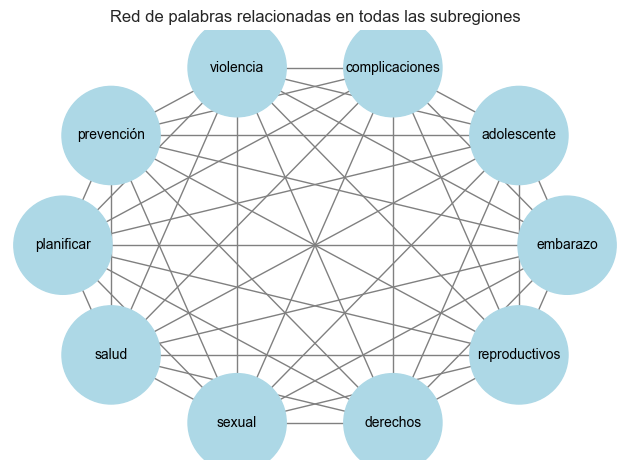

In [108]:
# Crear un grafo vacío
G = nx.Graph()

# Definir los términos como nodos
keywords = ['embarazo', 'adolescente', 'complicaciones', 'violencia', 'prevención', 'planificar', 'salud', 'sexual', 'derechos', 'reproductivos']

# Agregar los nodos al grafo
G.add_nodes_from(keywords)

# Iterar sobre cada subregión
for subregion in subregiones:
    # Obtener los textos de la subregión
    textos_subregion = textos[subregion]
    
    # Buscar las conexiones entre los términos en los textos de la subregión
    connections = [pair for pair in nx.edges(nx.complete_graph(keywords)) if all(term in textos_subregion for term in pair)]
    
    # Agregar las conexiones al grafo
    G.add_edges_from(connections)

# Definir el diseño del grafo
pos = nx.circular_layout(G)  # Utilizar layout circular

# Calcular el grado de cada nodo
node_degrees = G.degree()

# Extraer los tamaños de los nodos basados en el grado
node_sizes = [500 * (degree + 1) for node, degree in node_degrees]

# Dibujar los nodos con tamaños y colores personalizados
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=node_sizes)

# Dibujar las aristas
nx.draw_networkx_edges(G, pos, edge_color='gray')

# Dibujar las etiquetas de los nodos
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Configurar el título del gráfico
plt.title('Red de palabras relacionadas en todas las subregiones')

# Ajustar el espaciado entre los nodos
plt.tight_layout()

# Mostrar el gráfico
plt.axis('off')
plt.show()


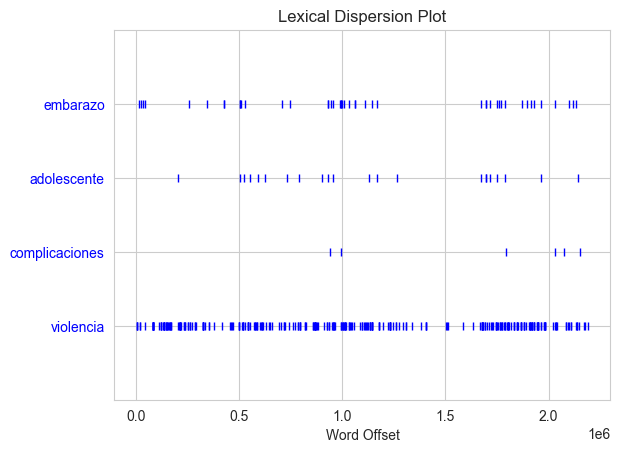

In [109]:
from nltk.draw import dispersion_plot

# Definir las palabras clave a graficar
keywords = ['embarazo', 'adolescente', 'complicaciones', 'violencia']

# Concatenar los textos de todas las subregiones en un solo texto
all_texts = [text for subregion in subregiones for text in textos[subregion]]

# Crear un objeto Text a partir de todos los textos
corpus = nltk.Text(all_texts)

# Generar el gráfico de dispersión
dispersion_plot(corpus, keywords)

## Oportunidades Económicas para las mujeres

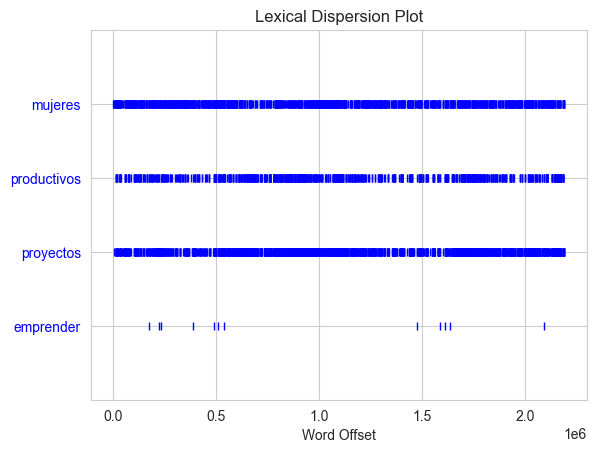

In [110]:
# Definir las palabras clave a graficar
keywords = ['mujeres', 'productivos', 'proyectos', 'emprender']

# Concatenar los textos de todas las subregiones en un solo texto
all_texts = [text for subregion in subregiones for text in textos[subregion]]

# Crear un objeto Text a partir de todos los textos
corpus = nltk.Text(all_texts)

# Generar el gráfico de dispersión
dispersion_plot(corpus, keywords)

## Analizar los trigramas al rededor de mujeres 

In [43]:
from nltk import ngrams

# Definir la palabra clave y el tamaño del n-grama
keyword = "mujeres"
n = 3

# Iterar sobre cada subregión
for subregion in subregiones:
    # Obtener los textos limpios de la subregión
    textos_limpios_subregion = cleaned_texts[subregion]

    # Obtener todas las palabras de los textos limpios de la subregión
    all_words = [word.lower() for text in textos_limpios_subregion for word in text.split()]

    # Generar trígramas (n=3) que incluyan la palabra "mujeres" y excluyan la palabra "enfoque"
    trigrams = list(ngrams(all_words, n))
    trigrams_with_keyword = [trigram for trigram in trigrams if keyword in trigram and 'enfoque' not in trigram]

    # Mostrar los primeros 10 trígramas con la palabra clave y sin la palabra "enfoque"
    print(f"Trígramas para la palabra '{keyword}' en la subregión '{subregion}':")
    for trigram in trigrams_with_keyword[:10]:
        print(trigram)
    print()  # Agregar una línea en blanco para separar los trígramas de cada subregión

Trígramas para la palabra 'mujeres' en la subregión 'ALTO PATÍA Y NORTE DEL CAUCA':
('predial', 'priorizando', 'mujeres')
('priorizando', 'mujeres', 'argelia')
('mujeres', 'argelia', 'cauca')
('propone', 'priorizar', 'mujeres')
('priorizar', 'mujeres', 'ordenamiento')
('mujeres', 'ordenamiento', 'social')
('decreto', 'priorizando', 'mujeres')
('priorizando', 'mujeres', 'incluya')
('mujeres', 'incluya', 'instalación')
('personas', 'hombre', 'mujeres')

Trígramas para la palabra 'mujeres' en la subregión 'ARAUCA':
('manera', 'colectiva', 'mujeres')
('colectiva', 'mujeres', 'comunidades')
('mujeres', 'comunidades', 'inicien')
('producción', 'agropecuaria', 'mujeres')
('agropecuaria', 'mujeres', 'indígenas')
('mujeres', 'indígenas', 'ordenamiento')
('agropecuaria', 'organizaciones', 'mujeres')
('organizaciones', 'mujeres', 'zonas')
('mujeres', 'zonas', 'reserva')
('financiamiento', 'priorice', 'mujeres')

Trígramas para la palabra 'mujeres' en la subregión 'CUENCA DEL CAGUÁN Y PIEDEMONTE C

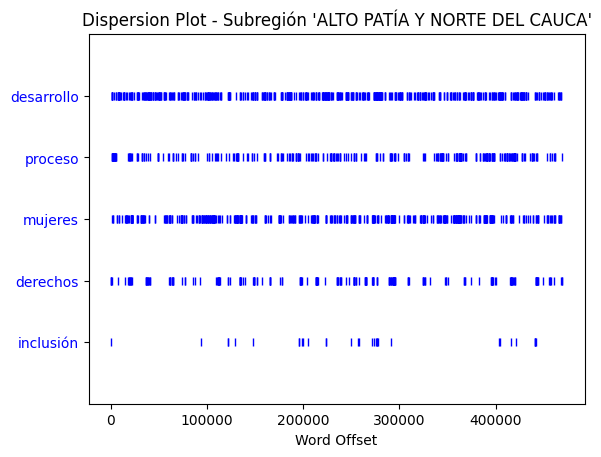

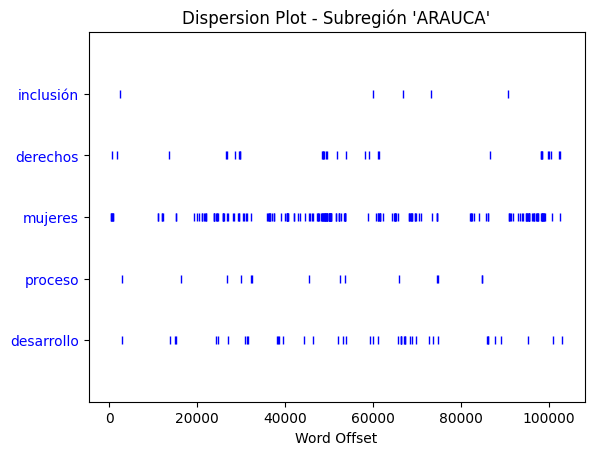

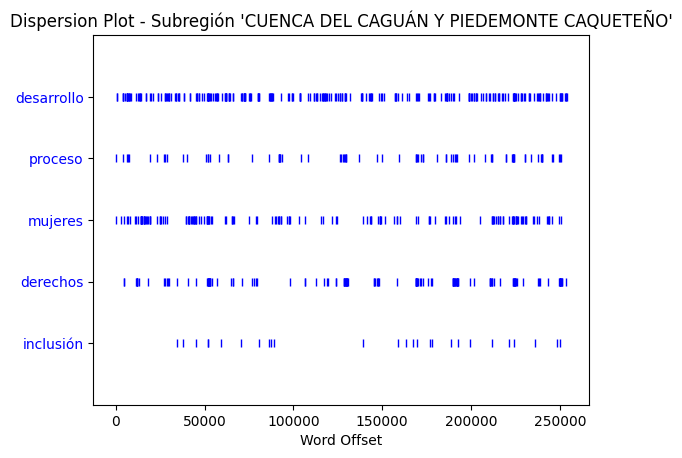

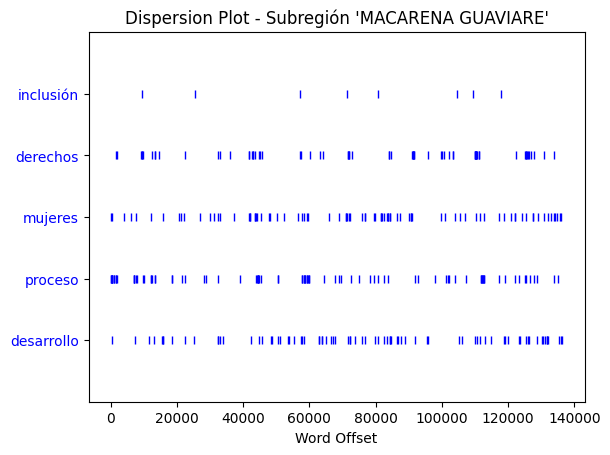

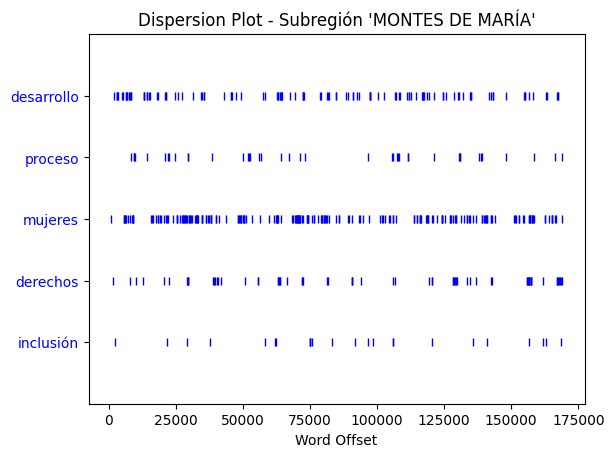

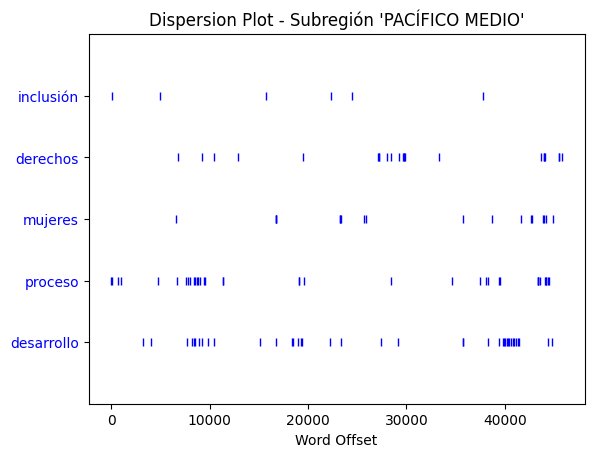

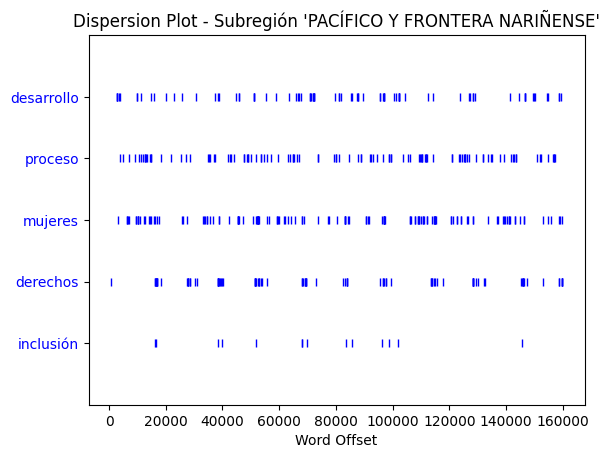

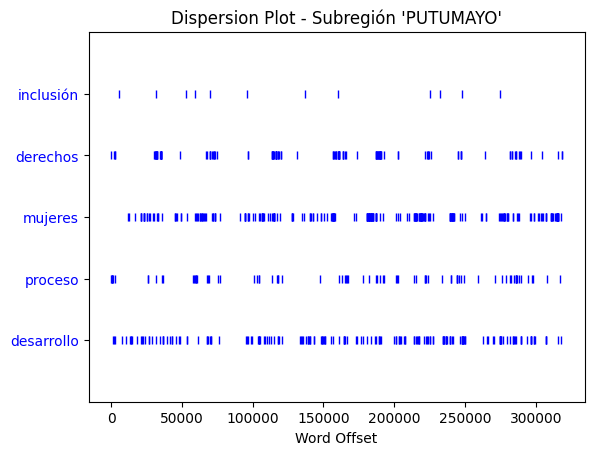

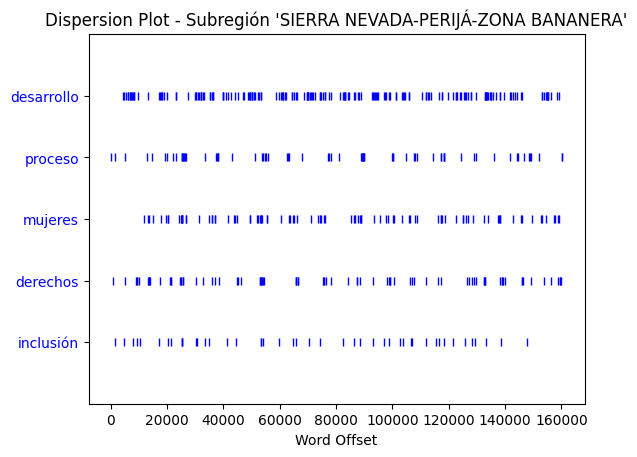

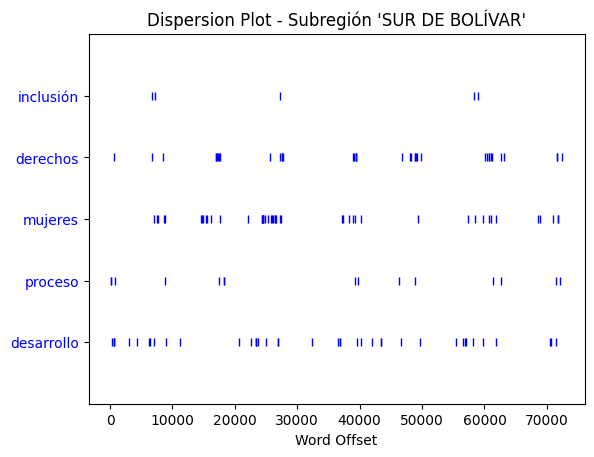

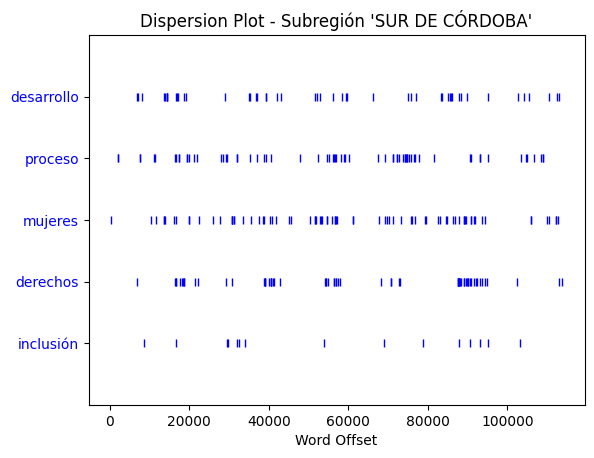

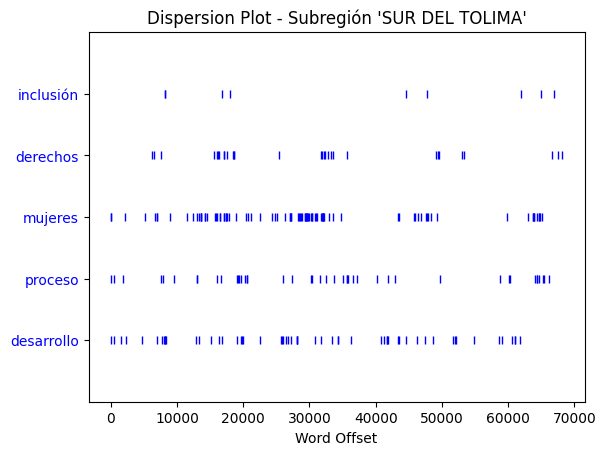

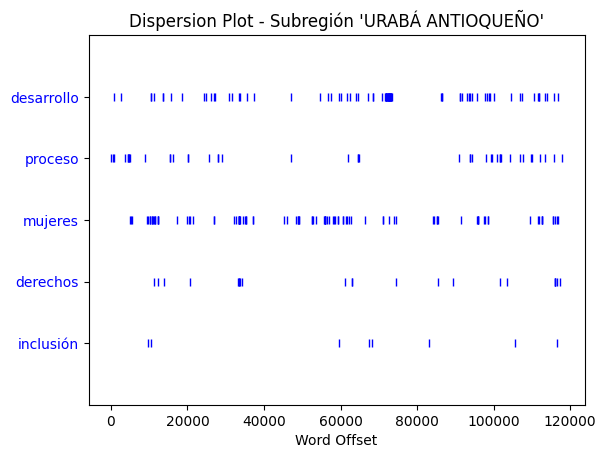

In [47]:
# Importar la función dispersion_plot
from nltk.draw.dispersion import dispersion_plot

# Definir las palabras a graficar
keywords = ['desarrollo', 'proceso', 'mujeres', 'derechos', 'inclusión']

# Iterar sobre cada subregión
for subregion in subregiones:
    # Obtener los textos de la subregión
    textos_subregion = textos[subregion]
    
    # Aplicar la función dispersion_plot a los textos de la subregión y las palabras clave
    dispersion_plot(textos_subregion, keywords, title=f"Dispersion Plot - Subregión '{subregion}'")

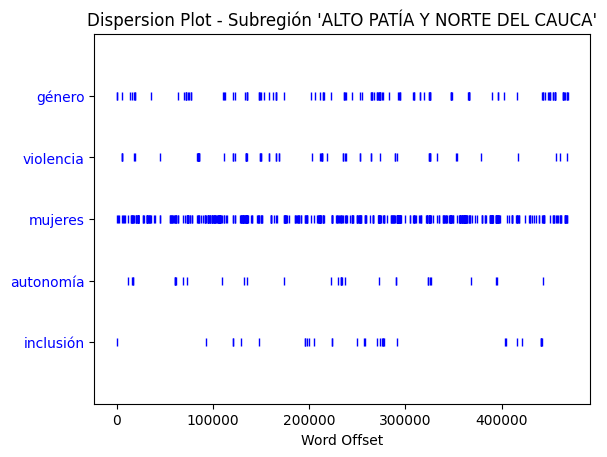

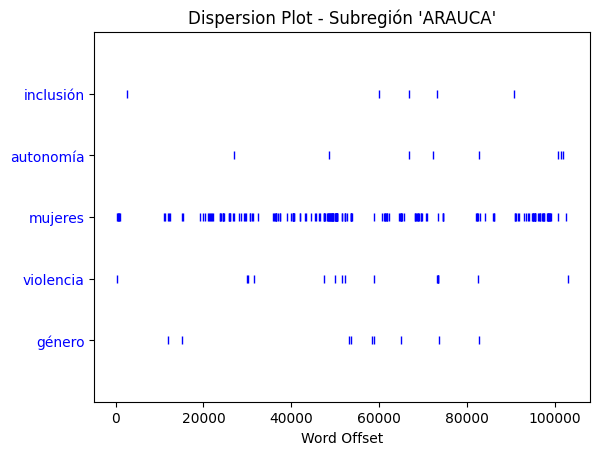

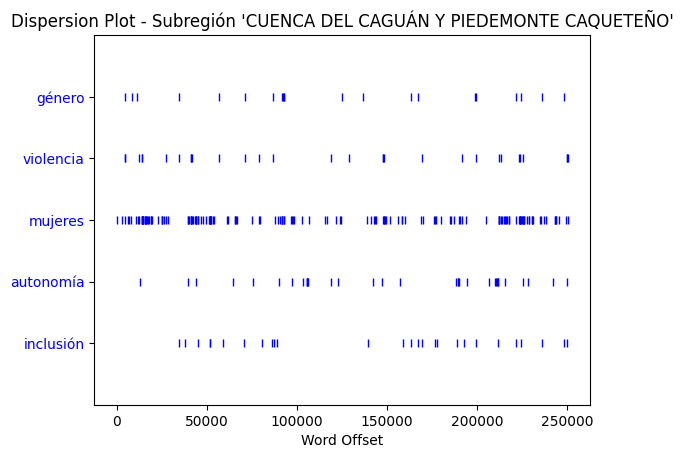

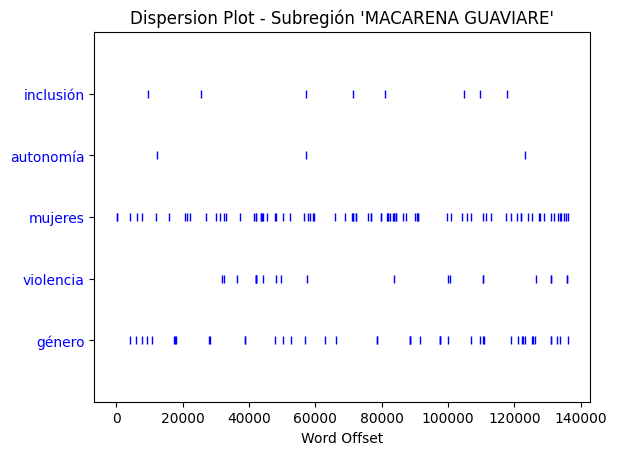

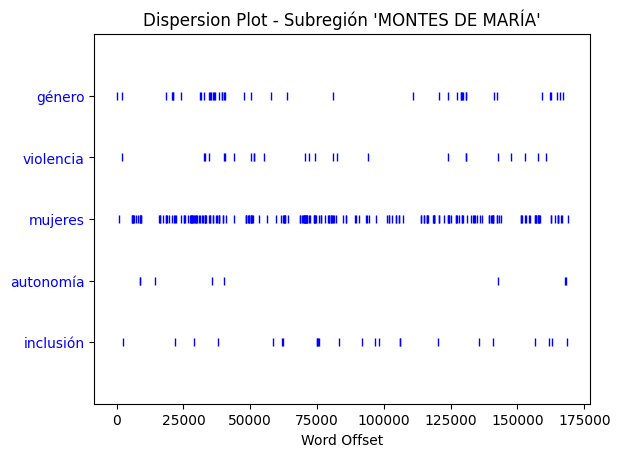

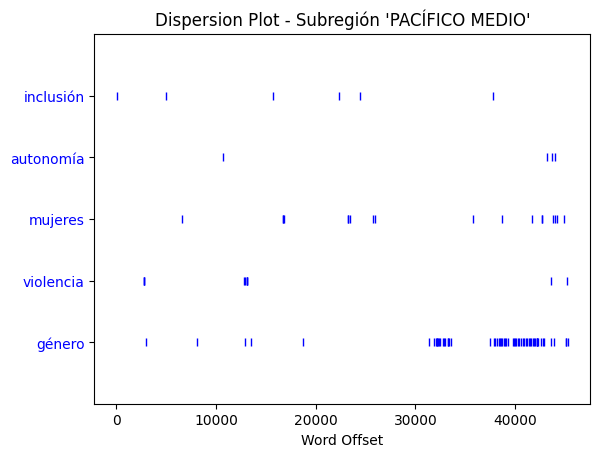

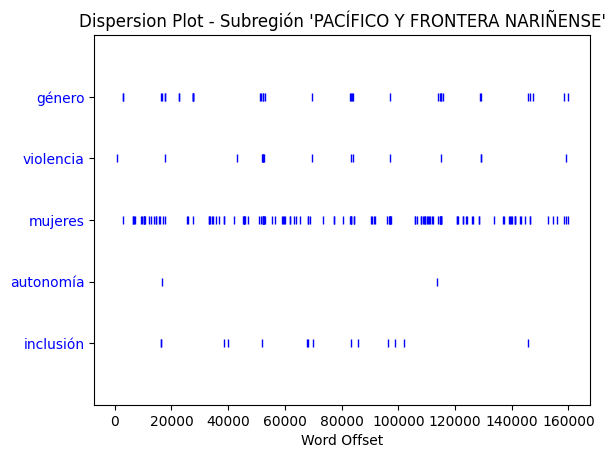

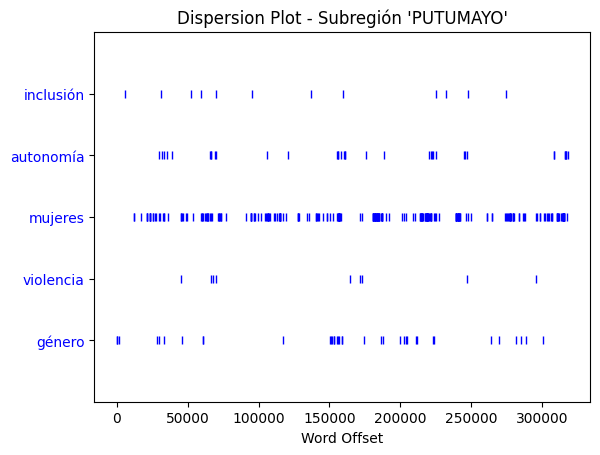

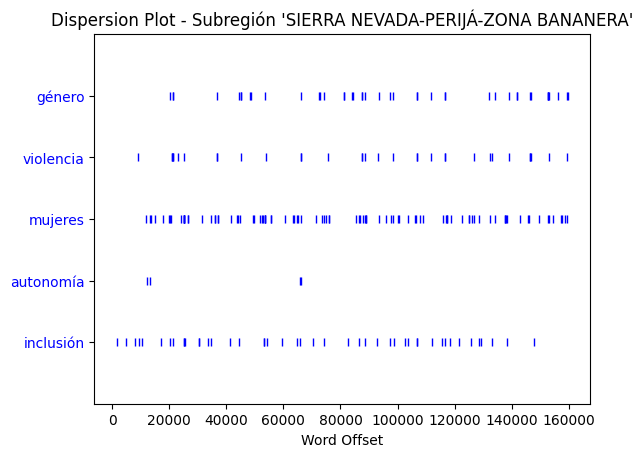

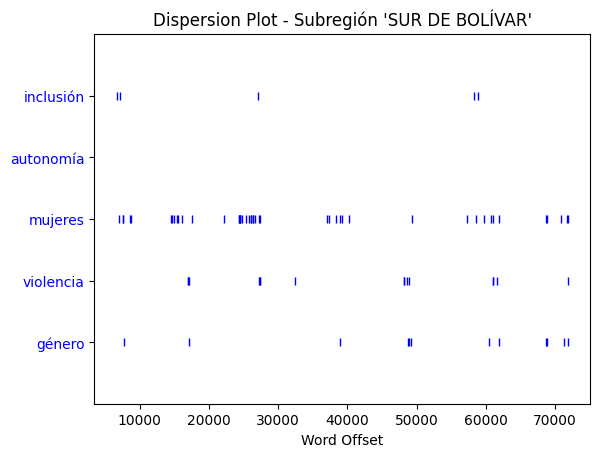

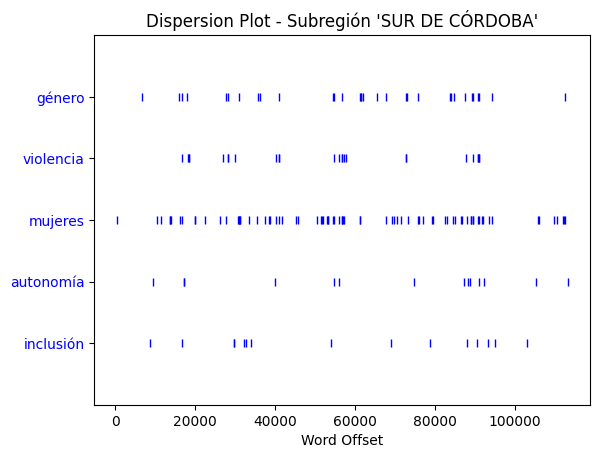

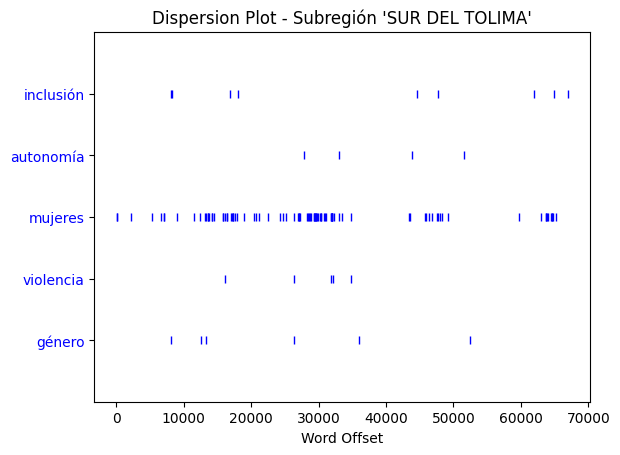

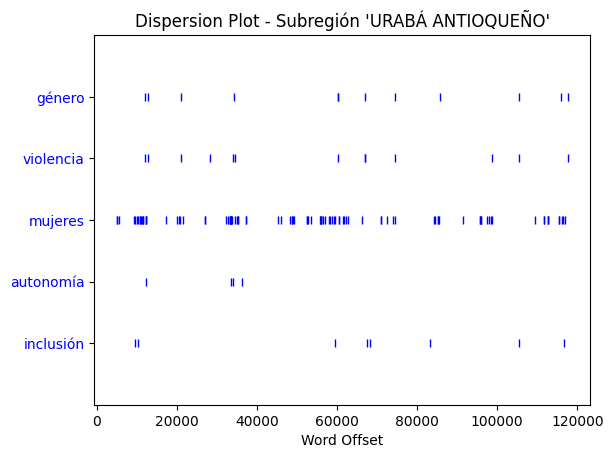

In [49]:
# Importar la función dispersion_plot
from nltk.draw.dispersion import dispersion_plot

# Definir las palabras a graficar
keywords = ['género', 'violencia', 'mujeres', 'autonomía', 'inclusión']

# Iterar sobre cada subregión
for subregion in subregiones:
    # Obtener los textos de la subregión
    textos_subregion = textos[subregion]
    
    # Aplicar la función dispersion_plot a los textos de la subregión y las palabras clave
    dispersion_plot(textos_subregion, keywords, title=f"Dispersion Plot - Subregión '{subregion}'")

## Contar las veces que aparece la plabras relacionadas a políticas de género

In [50]:
# Iterar sobre cada subregión
for subregion in subregiones:
    # Obtener el texto limpio de la subregión
    textos_limpios_subregion = cleaned_texts[subregion]
    
    # Contar la frecuencia de la palabra "género" en el texto limpio
    count = textos_limpios_subregion.count("género")
    
    # Imprimir el resultado
    print(f"La palabra 'género' aparece en la subregión '{subregion}': {count} veces.")

La palabra 'género' aparece en la subregión 'ALTO PATÍA Y NORTE DEL CAUCA': 125 veces.
La palabra 'género' aparece en la subregión 'ARAUCA': 9 veces.
La palabra 'género' aparece en la subregión 'CUENCA DEL CAGUÁN Y PIEDEMONTE CAQUETEÑO': 21 veces.
La palabra 'género' aparece en la subregión 'MACARENA GUAVIARE': 47 veces.
La palabra 'género' aparece en la subregión 'MONTES DE MARÍA': 46 veces.
La palabra 'género' aparece en la subregión 'PACÍFICO MEDIO': 61 veces.
La palabra 'género' aparece en la subregión 'PACÍFICO Y FRONTERA NARIÑENSE': 36 veces.
La palabra 'género' aparece en la subregión 'PUTUMAYO': 37 veces.
La palabra 'género' aparece en la subregión 'SIERRA NEVADA-PERIJÁ-ZONA BANANERA': 44 veces.
La palabra 'género' aparece en la subregión 'SUR DE BOLÍVAR': 12 veces.
La palabra 'género' aparece en la subregión 'SUR DE CÓRDOBA': 33 veces.
La palabra 'género' aparece en la subregión 'SUR DEL TOLIMA': 6 veces.
La palabra 'género' aparece en la subregión 'URABÁ ANTIOQUEÑO': 12 veces

In [51]:
# Iterar sobre cada subregión
for subregion in subregiones:
    # Obtener el texto limpio de la subregión
    textos_limpios_subregion = cleaned_texts[subregion]
    
    # Contar la frecuencia de la palabra "mujeres" en el texto limpio
    count = textos_limpios_subregion.count("mujeres")
    
    # Imprimir el resultado
    print(f"La palabra 'mujeres' aparece en la subregión '{subregion}': {count} veces.")

La palabra 'mujeres' aparece en la subregión 'ALTO PATÍA Y NORTE DEL CAUCA': 558 veces.
La palabra 'mujeres' aparece en la subregión 'ARAUCA': 201 veces.
La palabra 'mujeres' aparece en la subregión 'CUENCA DEL CAGUÁN Y PIEDEMONTE CAQUETEÑO': 156 veces.
La palabra 'mujeres' aparece en la subregión 'MACARENA GUAVIARE': 89 veces.
La palabra 'mujeres' aparece en la subregión 'MONTES DE MARÍA': 215 veces.
La palabra 'mujeres' aparece en la subregión 'PACÍFICO MEDIO': 18 veces.
La palabra 'mujeres' aparece en la subregión 'PACÍFICO Y FRONTERA NARIÑENSE': 146 veces.
La palabra 'mujeres' aparece en la subregión 'PUTUMAYO': 251 veces.
La palabra 'mujeres' aparece en la subregión 'SIERRA NEVADA-PERIJÁ-ZONA BANANERA': 97 veces.
La palabra 'mujeres' aparece en la subregión 'SUR DE BOLÍVAR': 46 veces.
La palabra 'mujeres' aparece en la subregión 'SUR DE CÓRDOBA': 81 veces.
La palabra 'mujeres' aparece en la subregión 'SUR DEL TOLIMA': 101 veces.
La palabra 'mujeres' aparece en la subregión 'URABÁ 

In [52]:
# Importar la librería nltk
from nltk import bigrams

# Inicializar una variable para almacenar el conteo total
total_count = 0

# Iterar sobre cada subregión
for subregion in subregiones:
    # Obtener el texto limpio de la subregión
    textos_limpios_subregion = cleaned_texts[subregion]
    
    # Generar pares de palabras (bigramas) a partir del texto limpio
    word_pairs = list(bigrams(textos_limpios_subregion))
    
    # Contar la frecuencia de la palabra "mujer" sin importar si está precedida o seguida por "hombre"
    count = sum(1 for w1, w2 in word_pairs if (w1 == "mujer" and w2 != "hombre") or (w2 == "mujer" and w1 != "hombre"))
    
    # Imprimir el resultado para cada subregión
    print(f"La palabra 'mujer' sin importar si está precedida o seguida por 'hombre' aparece en la subregión '{subregion}': {count} veces.")
    
    # Acumular el conteo total
    total_count += count

# Imprimir el conteo total
print("En todas las subregiones, la palabra 'mujer' sin importar si está precedida o seguida por 'hombre' aparece en total:", total_count, "veces.")

La palabra 'mujer' sin importar si está precedida o seguida por 'hombre' aparece en la subregión 'ALTO PATÍA Y NORTE DEL CAUCA': 248 veces.
La palabra 'mujer' sin importar si está precedida o seguida por 'hombre' aparece en la subregión 'ARAUCA': 70 veces.
La palabra 'mujer' sin importar si está precedida o seguida por 'hombre' aparece en la subregión 'CUENCA DEL CAGUÁN Y PIEDEMONTE CAQUETEÑO': 382 veces.
La palabra 'mujer' sin importar si está precedida o seguida por 'hombre' aparece en la subregión 'MACARENA GUAVIARE': 78 veces.
La palabra 'mujer' sin importar si está precedida o seguida por 'hombre' aparece en la subregión 'MONTES DE MARÍA': 142 veces.
La palabra 'mujer' sin importar si está precedida o seguida por 'hombre' aparece en la subregión 'PACÍFICO MEDIO': 14 veces.
La palabra 'mujer' sin importar si está precedida o seguida por 'hombre' aparece en la subregión 'PACÍFICO Y FRONTERA NARIÑENSE': 76 veces.
La palabra 'mujer' sin importar si está precedida o seguida por 'hombre

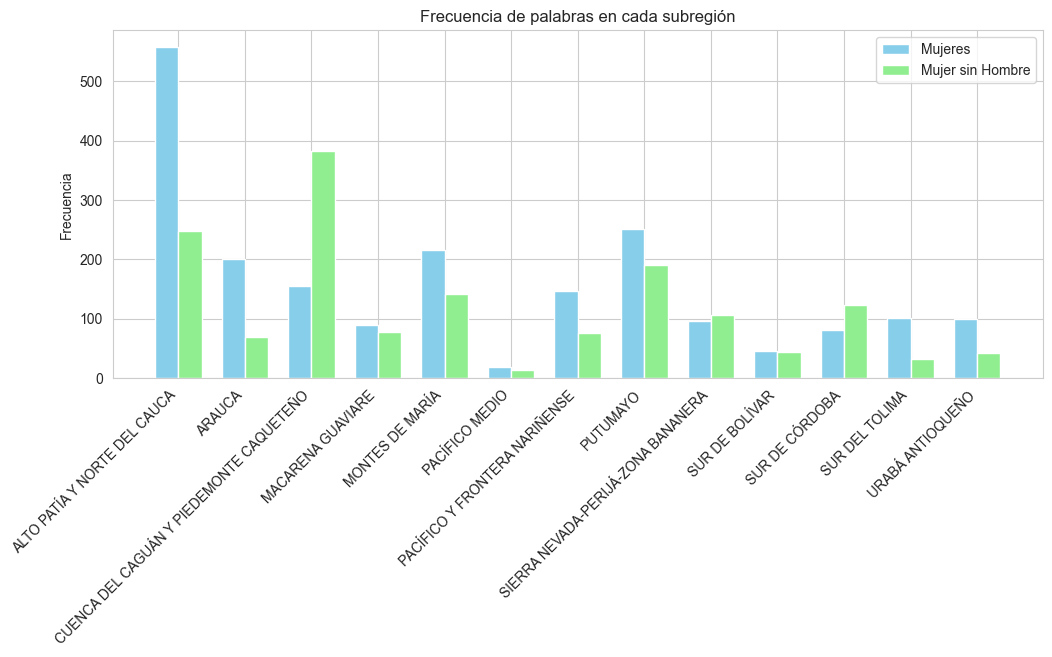

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de ejemplo
subregiones = [
    'ALTO PATÍA Y NORTE DEL CAUCA',
    'ARAUCA',
    'CUENCA DEL CAGUÁN Y PIEDEMONTE CAQUETEÑO',
    'MACARENA GUAVIARE',
    'MONTES DE MARÍA',
    'PACÍFICO MEDIO',
    'PACÍFICO Y FRONTERA NARIÑENSE',
    'PUTUMAYO',
    'SIERRA NEVADA-PERIJÁ-ZONA BANANERA',
    'SUR DE BOLÍVAR',
    'SUR DE CÓRDOBA',
    'SUR DEL TOLIMA',
    'URABÁ ANTIOQUEÑO'
]
mujeres_count = [558, 201, 156, 89, 215, 18, 146, 251, 97, 46, 81, 101, 100]
mujer_sin_hombre_count = [248, 70, 382, 78, 142, 14, 76, 190, 106, 44, 124, 32, 42]

# Configuración de Seaborn
sns.set_style("whitegrid")

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Ancho de las barras
bar_width = 0.35

# Coordenadas para las posiciones de las barras
bar_positions_mujeres = range(len(subregiones))
bar_positions_mujer_sin_hombre = [x + bar_width for x in bar_positions_mujeres]

# Dibujar las barras para "Mujeres"
ax.bar(bar_positions_mujeres, mujeres_count, color="skyblue", width=bar_width, label='Mujeres')

# Dibujar las barras para "Mujer sin Hombre"
ax.bar(bar_positions_mujer_sin_hombre, mujer_sin_hombre_count, color="lightgreen", width=bar_width, label='Mujer sin Hombre')

# Etiquetas en el eje x
ax.set_xticks([x + bar_width / 2 for x in bar_positions_mujeres])
ax.set_xticklabels(subregiones, rotation=45, ha='right')

# Etiquetas en el eje y
ax.set_ylabel('Frecuencia')

# Título del gráfico
ax.set_title('Frecuencia de palabras en cada subregión')

# Leyenda
ax.legend()

# Ajustar el espacio entre las barras
plt.subplots_adjust(bottom=0.3)

# Mostrar el gráfico
plt.show()

## Análisis de Grafos

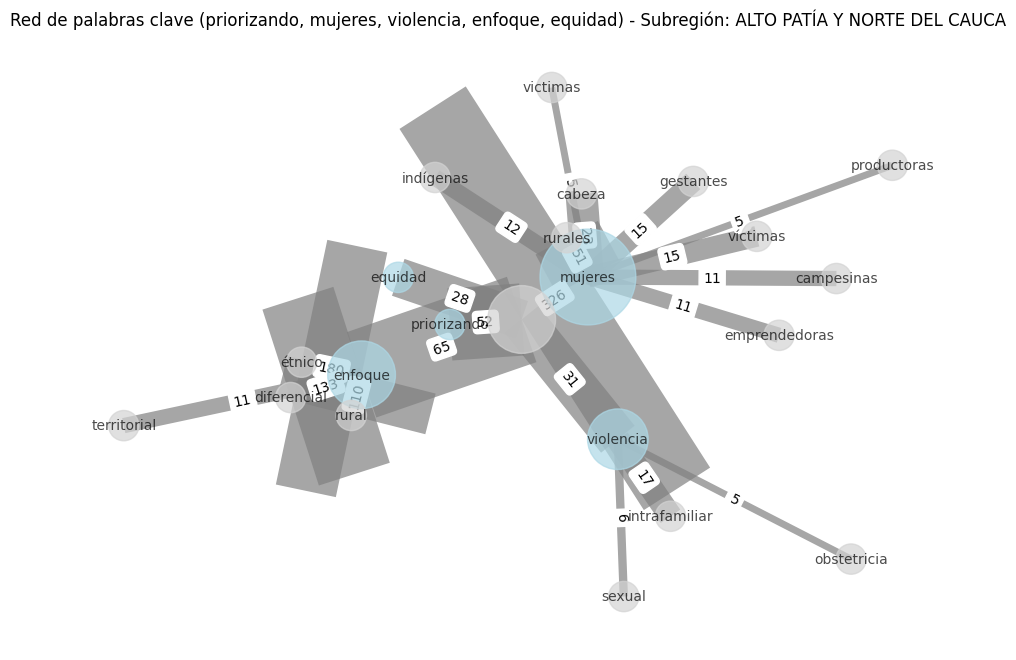

Nodo: mujeres - Centralidad de grado: 0.47619047619047616 - Centralidad de intermediación: 0.6857142857142857
Nodo:  - Centralidad de grado: 0.23809523809523808 - Centralidad de intermediación: 0.7095238095238096
Nodo: enfoque - Centralidad de grado: 0.23809523809523808 - Centralidad de intermediación: 0.3523809523809524
Nodo: violencia - Centralidad de grado: 0.19047619047619047 - Centralidad de intermediación: 0.27142857142857146
Nodo: priorizando - Centralidad de grado: 0.047619047619047616 - Centralidad de intermediación: 0.0
Nodo: equidad - Centralidad de grado: 0.047619047619047616 - Centralidad de intermediación: 0.0
Nodo: rural - Centralidad de grado: 0.047619047619047616 - Centralidad de intermediación: 0.0
Nodo: étnico - Centralidad de grado: 0.047619047619047616 - Centralidad de intermediación: 0.0
Nodo: diferencial - Centralidad de grado: 0.047619047619047616 - Centralidad de intermediación: 0.0
Nodo: intrafamiliar - Centralidad de grado: 0.047619047619047616 - Centralidad 

In [53]:
import matplotlib.pyplot as plt

# Definir las palabras clave
keywords = ['priorizando', 'mujeres', 'violencia', 'enfoque', 'equidad']

# Obtener el texto limpio de la subregión "ALTO PATÍA Y NORTE DEL CAUCA"
textos_limpios_subregion = cleaned_texts['ALTO PATÍA Y NORTE DEL CAUCA']

# Crear un grafo vacío
G = nx.Graph()

# Agregar los nodos al grafo con las palabras clave en el texto limpio
G.add_nodes_from(keywords)

# Obtener los bigramas en el texto limpio
bigrams = list(ngrams(textos_limpios_subregion, 2))

# Contar la frecuencia de los bigramas que contienen las palabras clave
bigram_frequency = {}
for bigram in bigrams:
    if any(keyword in bigram for keyword in keywords):
        bigram_frequency[bigram] = bigram_frequency.get(bigram, 0) + 1

# Definir un umbral de frecuencia para filtrar los bigramas
threshold = 5

# Agregar los enlaces entre nodos para los bigramas que superen el umbral de frecuencia
for bigram, frequency in bigram_frequency.items():
    if frequency >= threshold:
        G.add_edge(bigram[0], bigram[1], weight=frequency)

# Obtener los nodos más relevantes según su grado y peso de conexión
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

# Seleccionar los nodos más centrales para mostrar en el grafo
most_central_nodes = sorted(degree_centrality, key=lambda x: (degree_centrality[x], betweenness_centrality[x]), reverse=True)[:10]

# Ajustar los parámetros visuales del grafo
node_size = [10000 * degree_centrality[node] for node in G.nodes]
node_color = ['lightblue' if node in keywords else 'lightgray' for node in G.nodes]

# Aumentar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Visualizar el grafo
pos = nx.spring_layout(G, seed=42)
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
labels = nx.get_edge_attributes(G, 'weight')

nx.draw_networkx(G, pos, with_labels=True, node_size=node_size, node_color=node_color, font_size=10, edge_color='gray', width=weights, alpha=0.7)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title(f'Red de palabras clave ({", ".join(keywords)}) - Subregión: ALTO PATÍA Y NORTE DEL CAUCA')
plt.axis('off')
plt.show()

# Mostrar los nodos más centrales
for node in most_central_nodes:
    print("Nodo:", node, "- Centralidad de grado:", degree_centrality[node], "- Centralidad de intermediación:", betweenness_centrality[node])

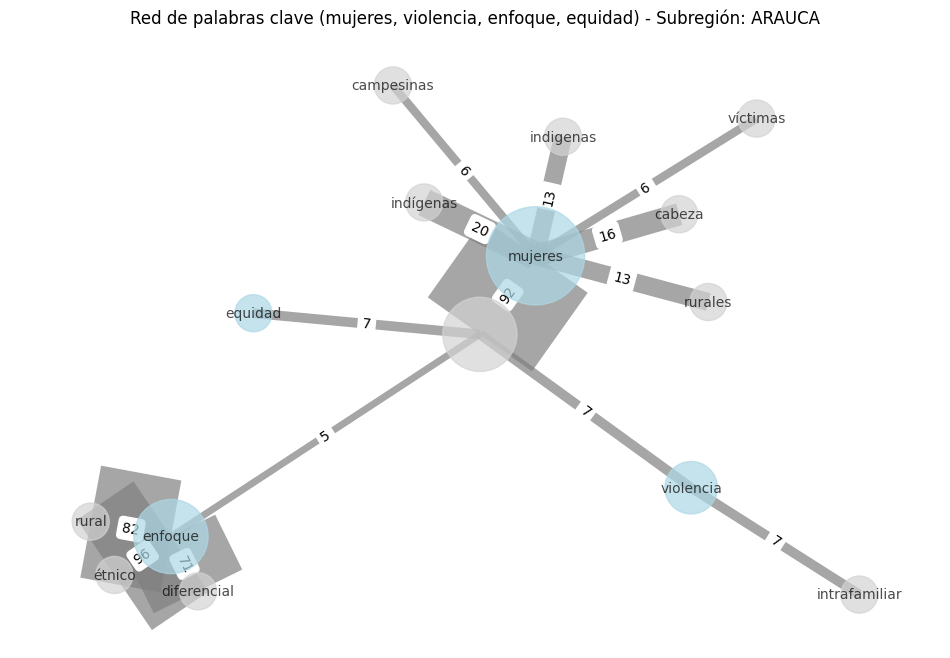

Nodo: mujeres - Centralidad de grado: 0.5 - Centralidad de intermediación: 0.6923076923076924
Nodo:  - Centralidad de grado: 0.2857142857142857 - Centralidad de intermediación: 0.6923076923076924
Nodo: enfoque - Centralidad de grado: 0.2857142857142857 - Centralidad de intermediación: 0.39560439560439564
Nodo: violencia - Centralidad de grado: 0.14285714285714285 - Centralidad de intermediación: 0.14285714285714288
Nodo: equidad - Centralidad de grado: 0.07142857142857142 - Centralidad de intermediación: 0.0
Nodo: indígenas - Centralidad de grado: 0.07142857142857142 - Centralidad de intermediación: 0.0
Nodo: cabeza - Centralidad de grado: 0.07142857142857142 - Centralidad de intermediación: 0.0
Nodo: diferencial - Centralidad de grado: 0.07142857142857142 - Centralidad de intermediación: 0.0
Nodo: rural - Centralidad de grado: 0.07142857142857142 - Centralidad de intermediación: 0.0
Nodo: étnico - Centralidad de grado: 0.07142857142857142 - Centralidad de intermediación: 0.0


In [57]:
# Definir las palabras clave
keywords = ['mujeres', 'violencia', 'enfoque', 'equidad']

# Obtener el texto limpio de la subregión "ALTO PATÍA Y NORTE DEL CAUCA"
textos_limpios_subregion = cleaned_texts['ARAUCA']

# Crear un grafo vacío
G = nx.Graph()

# Agregar los nodos al grafo con las palabras clave en el texto limpio
G.add_nodes_from(keywords)

# Obtener los bigramas en el texto limpio
bigrams = list(ngrams(textos_limpios_subregion, 2))

# Contar la frecuencia de los bigramas que contienen las palabras clave
bigram_frequency = {}
for bigram in bigrams:
    if any(keyword in bigram for keyword in keywords):
        bigram_frequency[bigram] = bigram_frequency.get(bigram, 0) + 1

# Definir un umbral de frecuencia para filtrar los bigramas
threshold = 5

# Agregar los enlaces entre nodos para los bigramas que superen el umbral de frecuencia
for bigram, frequency in bigram_frequency.items():
    if frequency >= threshold:
        G.add_edge(bigram[0], bigram[1], weight=frequency)

# Obtener los nodos más relevantes según su grado y peso de conexión
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

# Seleccionar los nodos más centrales para mostrar en el grafo
most_central_nodes = sorted(degree_centrality, key=lambda x: (degree_centrality[x], betweenness_centrality[x]), reverse=True)[:10]

# Ajustar los parámetros visuales del grafo
node_size = [10000 * degree_centrality[node] for node in G.nodes]
node_color = ['lightblue' if node in keywords else 'lightgray' for node in G.nodes]

# Aumentar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Visualizar el grafo
pos = nx.spring_layout(G, seed=42)
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
labels = nx.get_edge_attributes(G, 'weight')

nx.draw_networkx(G, pos, with_labels=True, node_size=node_size, node_color=node_color, font_size=10, edge_color='gray', width=weights, alpha=0.7)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title(f'Red de palabras clave ({", ".join(keywords)}) - Subregión: ARAUCA')
plt.axis('off')
plt.show()

# Mostrar los nodos más centrales
for node in most_central_nodes:
    print("Nodo:", node, "- Centralidad de grado:", degree_centrality[node], "- Centralidad de intermediación:", betweenness_centrality[node])

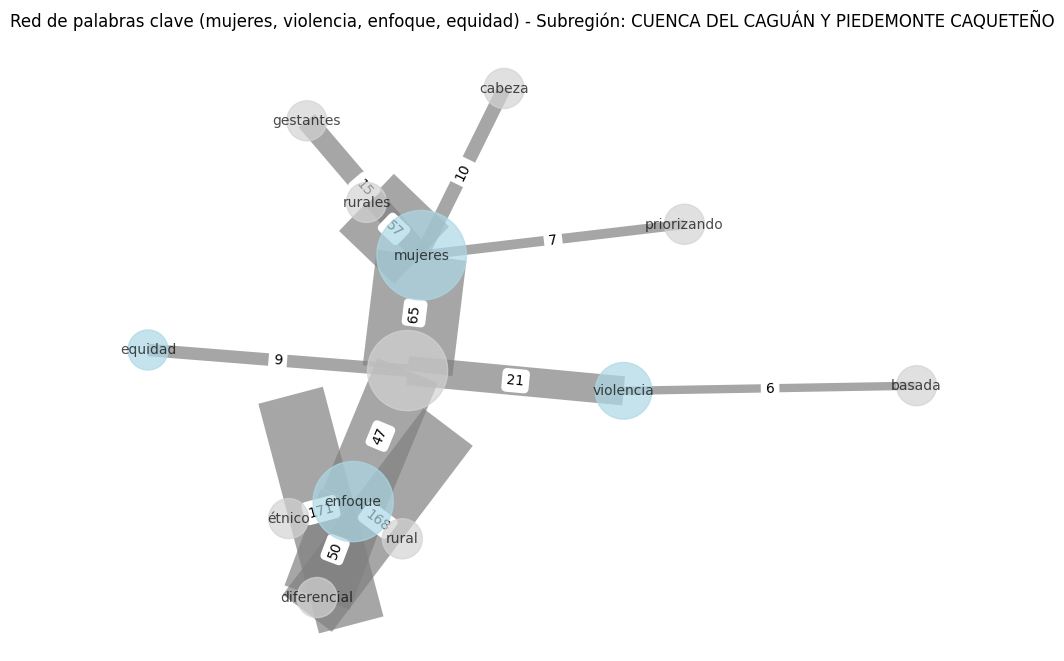

Nodo: mujeres - Centralidad de grado: 0.41666666666666663 - Centralidad de intermediación: 0.5757575757575758
Nodo:  - Centralidad de grado: 0.3333333333333333 - Centralidad de intermediación: 0.7424242424242424
Nodo: enfoque - Centralidad de grado: 0.3333333333333333 - Centralidad de intermediación: 0.4545454545454546
Nodo: violencia - Centralidad de grado: 0.16666666666666666 - Centralidad de intermediación: 0.16666666666666669
Nodo: equidad - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: rural - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: étnico - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: diferencial - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: basada - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: rurales - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 

In [58]:
# Definir las palabras clave
keywords = ['mujeres', 'violencia', 'enfoque', 'equidad']

# Obtener el texto limpio de la subregión "ALTO PATÍA Y NORTE DEL CAUCA"
textos_limpios_subregion = cleaned_texts['CUENCA DEL CAGUÁN Y PIEDEMONTE CAQUETEÑO']

# Crear un grafo vacío
G = nx.Graph()

# Agregar los nodos al grafo con las palabras clave en el texto limpio
G.add_nodes_from(keywords)

# Obtener los bigramas en el texto limpio
bigrams = list(ngrams(textos_limpios_subregion, 2))

# Contar la frecuencia de los bigramas que contienen las palabras clave
bigram_frequency = {}
for bigram in bigrams:
    if any(keyword in bigram for keyword in keywords):
        bigram_frequency[bigram] = bigram_frequency.get(bigram, 0) + 1

# Definir un umbral de frecuencia para filtrar los bigramas
threshold = 5

# Agregar los enlaces entre nodos para los bigramas que superen el umbral de frecuencia
for bigram, frequency in bigram_frequency.items():
    if frequency >= threshold:
        G.add_edge(bigram[0], bigram[1], weight=frequency)

# Obtener los nodos más relevantes según su grado y peso de conexión
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

# Seleccionar los nodos más centrales para mostrar en el grafo
most_central_nodes = sorted(degree_centrality, key=lambda x: (degree_centrality[x], betweenness_centrality[x]), reverse=True)[:10]

# Ajustar los parámetros visuales del grafo
node_size = [10000 * degree_centrality[node] for node in G.nodes]
node_color = ['lightblue' if node in keywords else 'lightgray' for node in G.nodes]

# Aumentar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Visualizar el grafo
pos = nx.spring_layout(G, seed=42)
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
labels = nx.get_edge_attributes(G, 'weight')

nx.draw_networkx(G, pos, with_labels=True, node_size=node_size, node_color=node_color, font_size=10, edge_color='gray', width=weights, alpha=0.7)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title(f'Red de palabras clave ({", ".join(keywords)}) - Subregión: CUENCA DEL CAGUÁN Y PIEDEMONTE CAQUETEÑO')
plt.axis('off')
plt.show()

# Mostrar los nodos más centrales
for node in most_central_nodes:
    print("Nodo:", node, "- Centralidad de grado:", degree_centrality[node], "- Centralidad de intermediación:", betweenness_centrality[node])

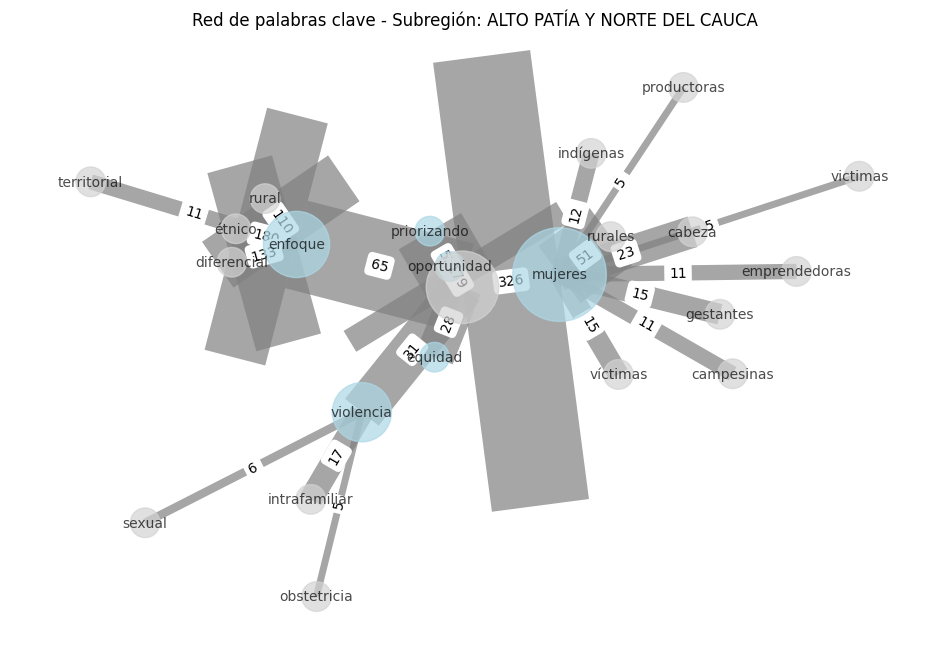

Nodo: mujeres - Centralidad de grado: 0.4545454545454546 - Centralidad de intermediación: 0.6623376623376623
Nodo:  - Centralidad de grado: 0.2727272727272727 - Centralidad de intermediación: 0.7359307359307359
Nodo: enfoque - Centralidad de grado: 0.2272727272727273 - Centralidad de intermediación: 0.33766233766233766
Nodo: violencia - Centralidad de grado: 0.18181818181818182 - Centralidad de intermediación: 0.2597402597402597
Nodo: priorizando - Centralidad de grado: 0.045454545454545456 - Centralidad de intermediación: 0.0
Nodo: equidad - Centralidad de grado: 0.045454545454545456 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.045454545454545456 - Centralidad de intermediación: 0.0
Nodo: rural - Centralidad de grado: 0.045454545454545456 - Centralidad de intermediación: 0.0
Nodo: étnico - Centralidad de grado: 0.045454545454545456 - Centralidad de intermediación: 0.0
Nodo: diferencial - Centralidad de grado: 0.045454545454545456 - Centralidad de in

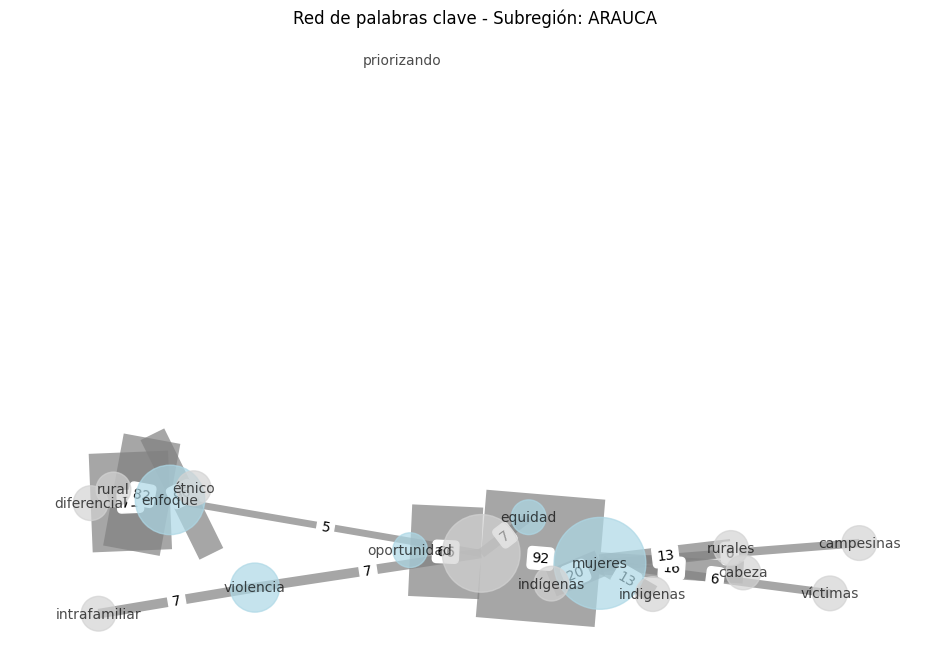

Nodo: mujeres - Centralidad de grado: 0.4375 - Centralidad de intermediación: 0.575
Nodo:  - Centralidad de grado: 0.3125 - Centralidad de intermediación: 0.6416666666666666
Nodo: enfoque - Centralidad de grado: 0.25 - Centralidad de intermediación: 0.325
Nodo: violencia - Centralidad de grado: 0.125 - Centralidad de intermediación: 0.11666666666666667
Nodo: equidad - Centralidad de grado: 0.0625 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.0625 - Centralidad de intermediación: 0.0
Nodo: indígenas - Centralidad de grado: 0.0625 - Centralidad de intermediación: 0.0
Nodo: cabeza - Centralidad de grado: 0.0625 - Centralidad de intermediación: 0.0
Nodo: diferencial - Centralidad de grado: 0.0625 - Centralidad de intermediación: 0.0
Nodo: rural - Centralidad de grado: 0.0625 - Centralidad de intermediación: 0.0



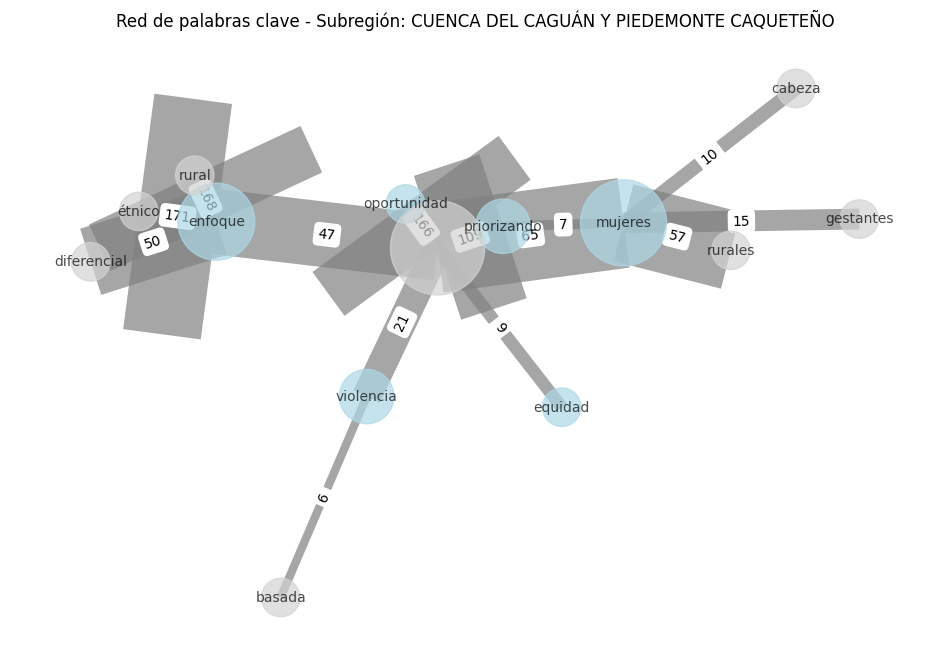

Nodo:  - Centralidad de grado: 0.46153846153846156 - Centralidad de intermediación: 0.782051282051282
Nodo: mujeres - Centralidad de grado: 0.38461538461538464 - Centralidad de intermediación: 0.5384615384615384
Nodo: enfoque - Centralidad de grado: 0.3076923076923077 - Centralidad de intermediación: 0.4230769230769231
Nodo: violencia - Centralidad de grado: 0.15384615384615385 - Centralidad de intermediación: 0.15384615384615385
Nodo: priorizando - Centralidad de grado: 0.15384615384615385 - Centralidad de intermediación: 0.0
Nodo: equidad - Centralidad de grado: 0.07692307692307693 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.07692307692307693 - Centralidad de intermediación: 0.0
Nodo: rural - Centralidad de grado: 0.07692307692307693 - Centralidad de intermediación: 0.0
Nodo: étnico - Centralidad de grado: 0.07692307692307693 - Centralidad de intermediación: 0.0
Nodo: diferencial - Centralidad de grado: 0.07692307692307693 - Centralidad de interme

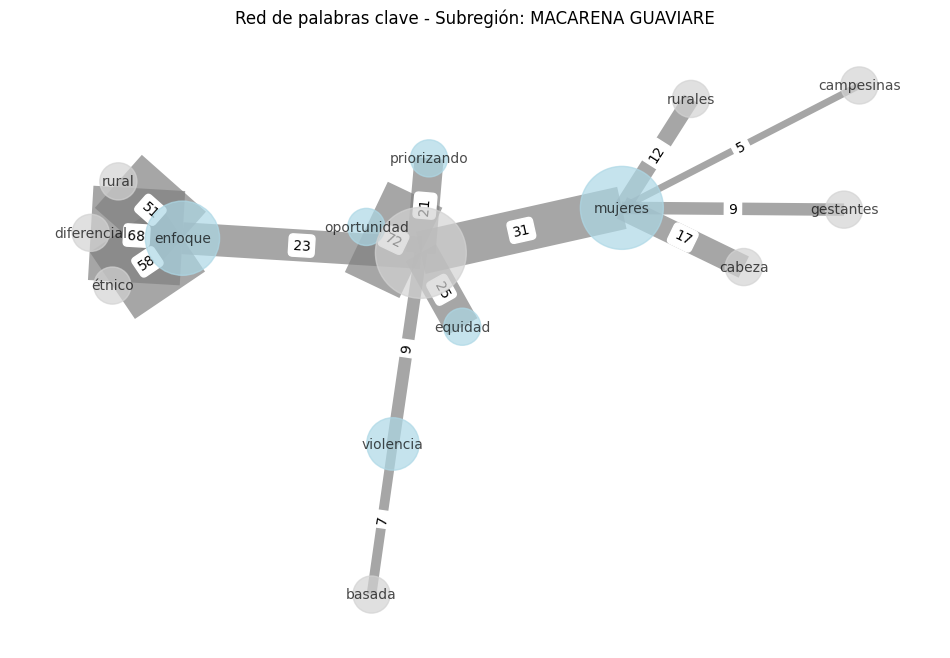

Nodo:  - Centralidad de grado: 0.42857142857142855 - Centralidad de intermediación: 0.8131868131868133
Nodo: mujeres - Centralidad de grado: 0.3571428571428571 - Centralidad de intermediación: 0.5054945054945056
Nodo: enfoque - Centralidad de grado: 0.2857142857142857 - Centralidad de intermediación: 0.39560439560439564
Nodo: violencia - Centralidad de grado: 0.14285714285714285 - Centralidad de intermediación: 0.14285714285714288
Nodo: priorizando - Centralidad de grado: 0.07142857142857142 - Centralidad de intermediación: 0.0
Nodo: equidad - Centralidad de grado: 0.07142857142857142 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.07142857142857142 - Centralidad de intermediación: 0.0
Nodo: cabeza - Centralidad de grado: 0.07142857142857142 - Centralidad de intermediación: 0.0
Nodo: rural - Centralidad de grado: 0.07142857142857142 - Centralidad de intermediación: 0.0
Nodo: étnico - Centralidad de grado: 0.07142857142857142 - Centralidad de intermediac

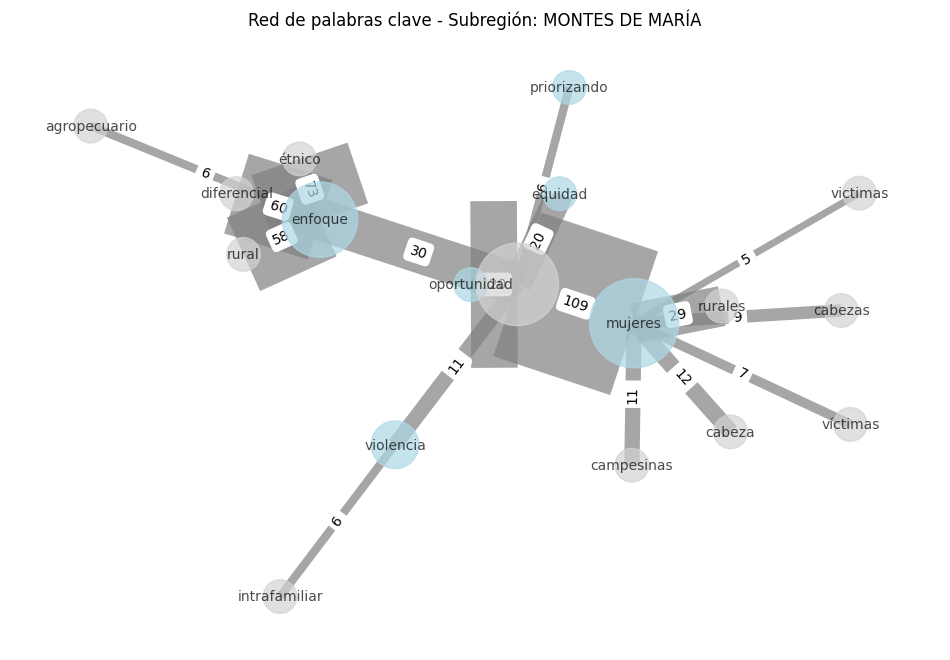

Nodo: mujeres - Centralidad de grado: 0.4117647058823529 - Centralidad de intermediación: 0.5955882352941176
Nodo:  - Centralidad de grado: 0.3529411764705882 - Centralidad de intermediación: 0.7647058823529411
Nodo: enfoque - Centralidad de grado: 0.29411764705882354 - Centralidad de intermediación: 0.4264705882352941
Nodo: violencia - Centralidad de grado: 0.11764705882352941 - Centralidad de intermediación: 0.11764705882352941
Nodo: priorizando - Centralidad de grado: 0.058823529411764705 - Centralidad de intermediación: 0.0
Nodo: equidad - Centralidad de grado: 0.058823529411764705 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.058823529411764705 - Centralidad de intermediación: 0.0
Nodo: intrafamiliar - Centralidad de grado: 0.058823529411764705 - Centralidad de intermediación: 0.0
Nodo: diferencial - Centralidad de grado: 0.058823529411764705 - Centralidad de intermediación: 0.0
Nodo: rurales - Centralidad de grado: 0.058823529411764705 - Central

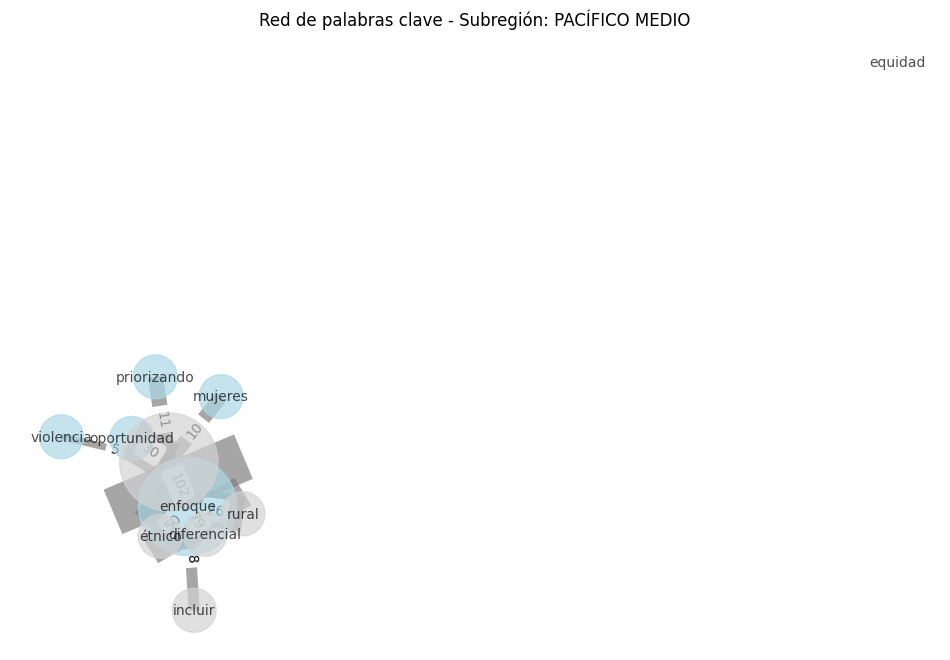

Nodo: enfoque - Centralidad de grado: 0.5 - Centralidad de intermediación: 0.5777777777777778
Nodo:  - Centralidad de grado: 0.5 - Centralidad de intermediación: 0.5777777777777778
Nodo: priorizando - Centralidad de grado: 0.1 - Centralidad de intermediación: 0.0
Nodo: mujeres - Centralidad de grado: 0.1 - Centralidad de intermediación: 0.0
Nodo: violencia - Centralidad de grado: 0.1 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.1 - Centralidad de intermediación: 0.0
Nodo: rural - Centralidad de grado: 0.1 - Centralidad de intermediación: 0.0
Nodo: étnico - Centralidad de grado: 0.1 - Centralidad de intermediación: 0.0
Nodo: diferencial - Centralidad de grado: 0.1 - Centralidad de intermediación: 0.0
Nodo: incluir - Centralidad de grado: 0.1 - Centralidad de intermediación: 0.0



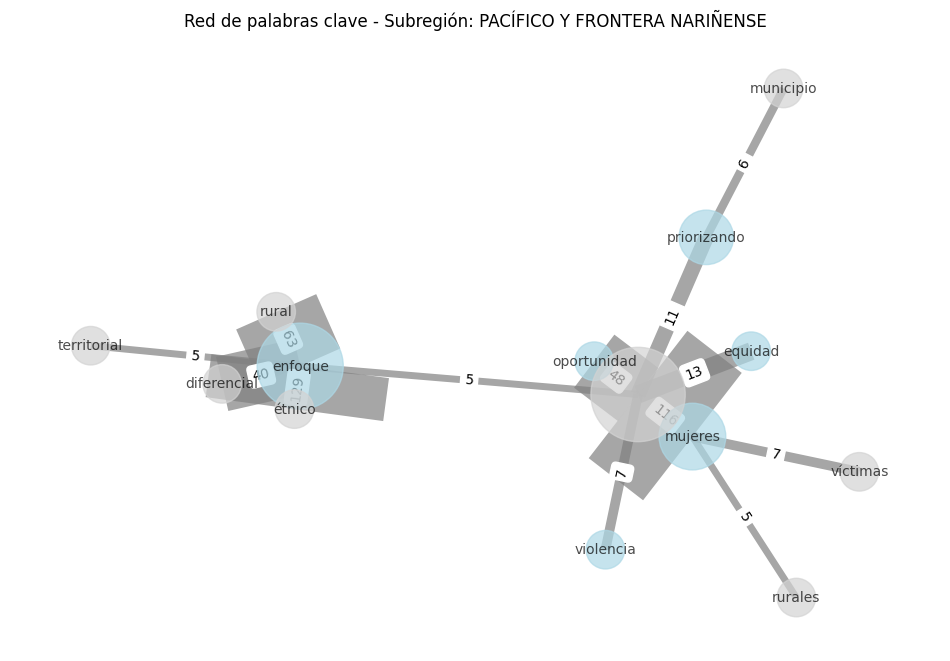

Nodo:  - Centralidad de grado: 0.46153846153846156 - Centralidad de intermediación: 0.8205128205128205
Nodo: enfoque - Centralidad de grado: 0.38461538461538464 - Centralidad de intermediación: 0.5384615384615384
Nodo: mujeres - Centralidad de grado: 0.23076923076923078 - Centralidad de intermediación: 0.2948717948717949
Nodo: priorizando - Centralidad de grado: 0.15384615384615385 - Centralidad de intermediación: 0.15384615384615385
Nodo: violencia - Centralidad de grado: 0.07692307692307693 - Centralidad de intermediación: 0.0
Nodo: equidad - Centralidad de grado: 0.07692307692307693 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.07692307692307693 - Centralidad de intermediación: 0.0
Nodo: rural - Centralidad de grado: 0.07692307692307693 - Centralidad de intermediación: 0.0
Nodo: étnico - Centralidad de grado: 0.07692307692307693 - Centralidad de intermediación: 0.0
Nodo: rurales - Centralidad de grado: 0.07692307692307693 - Centralidad de intermedi

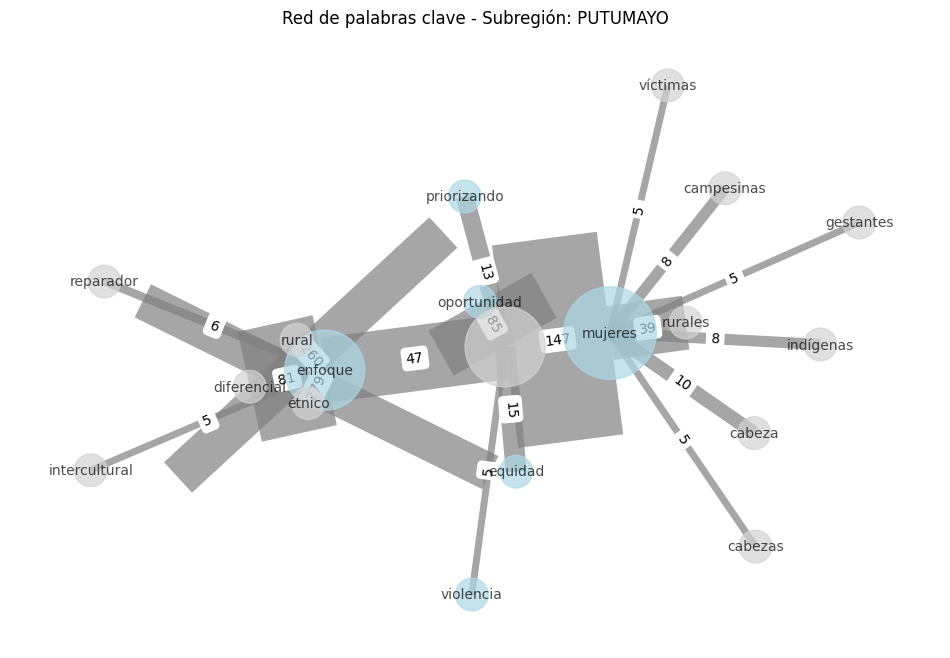

Nodo: mujeres - Centralidad de grado: 0.4444444444444444 - Centralidad de intermediación: 0.6405228758169935
Nodo:  - Centralidad de grado: 0.3333333333333333 - Centralidad de intermediación: 0.7189542483660131
Nodo: enfoque - Centralidad de grado: 0.3333333333333333 - Centralidad de intermediación: 0.4901960784313726
Nodo: priorizando - Centralidad de grado: 0.05555555555555555 - Centralidad de intermediación: 0.0
Nodo: violencia - Centralidad de grado: 0.05555555555555555 - Centralidad de intermediación: 0.0
Nodo: equidad - Centralidad de grado: 0.05555555555555555 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.05555555555555555 - Centralidad de intermediación: 0.0
Nodo: reparador - Centralidad de grado: 0.05555555555555555 - Centralidad de intermediación: 0.0
Nodo: rural - Centralidad de grado: 0.05555555555555555 - Centralidad de intermediación: 0.0
Nodo: étnico - Centralidad de grado: 0.05555555555555555 - Centralidad de intermediación: 0.0



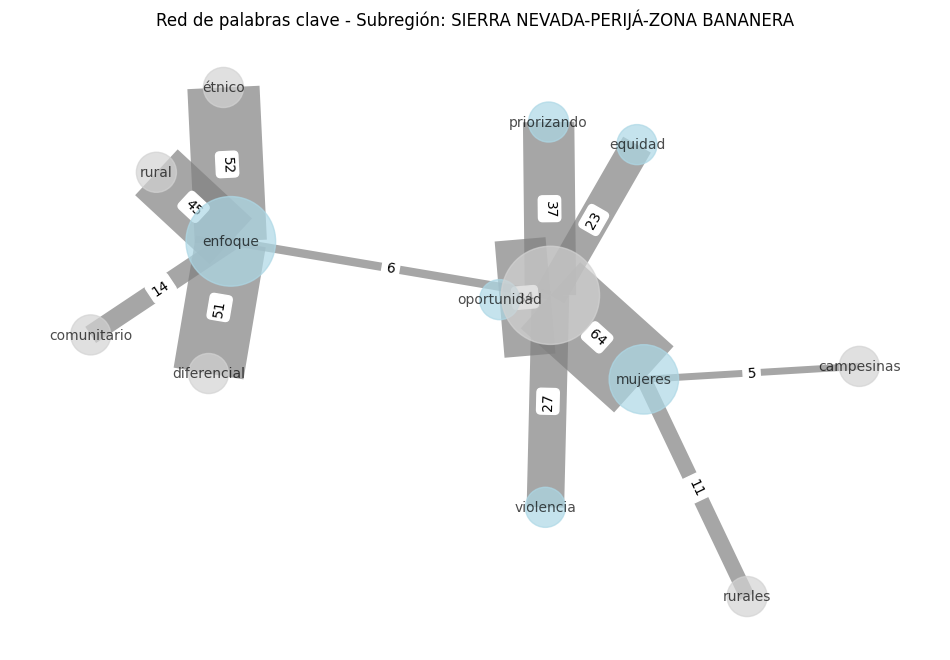

Nodo:  - Centralidad de grado: 0.5 - Centralidad de intermediación: 0.8030303030303031
Nodo: enfoque - Centralidad de grado: 0.41666666666666663 - Centralidad de intermediación: 0.5757575757575758
Nodo: mujeres - Centralidad de grado: 0.25 - Centralidad de intermediación: 0.3181818181818182
Nodo: priorizando - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: violencia - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: equidad - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: rural - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: étnico - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: diferencial - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0



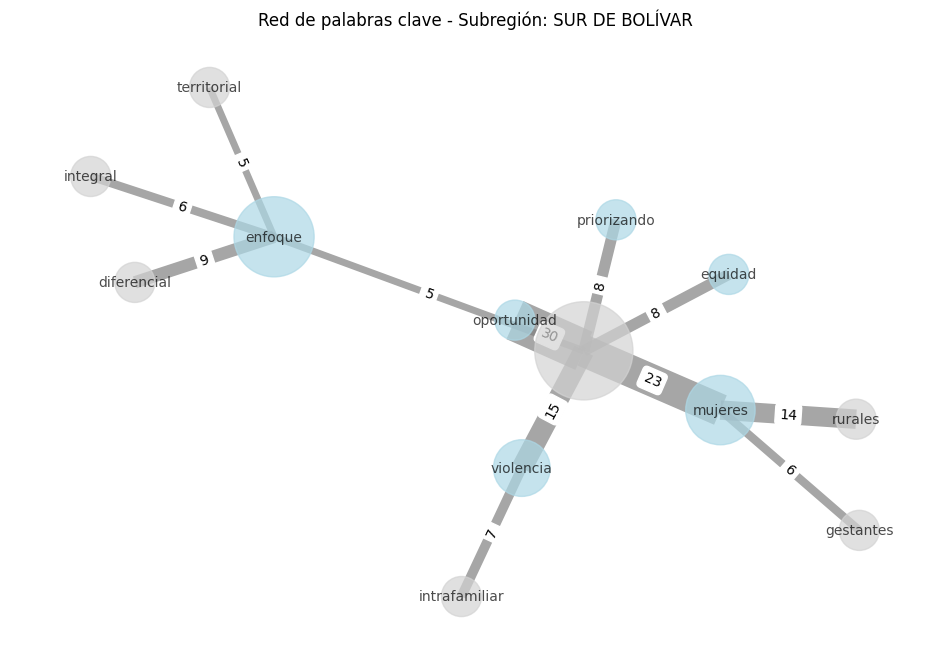

Nodo:  - Centralidad de grado: 0.5 - Centralidad de intermediación: 0.8484848484848485
Nodo: enfoque - Centralidad de grado: 0.3333333333333333 - Centralidad de intermediación: 0.4545454545454546
Nodo: mujeres - Centralidad de grado: 0.25 - Centralidad de intermediación: 0.3181818181818182
Nodo: violencia - Centralidad de grado: 0.16666666666666666 - Centralidad de intermediación: 0.16666666666666669
Nodo: priorizando - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: equidad - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: gestantes - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: territorial - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: diferencial - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0



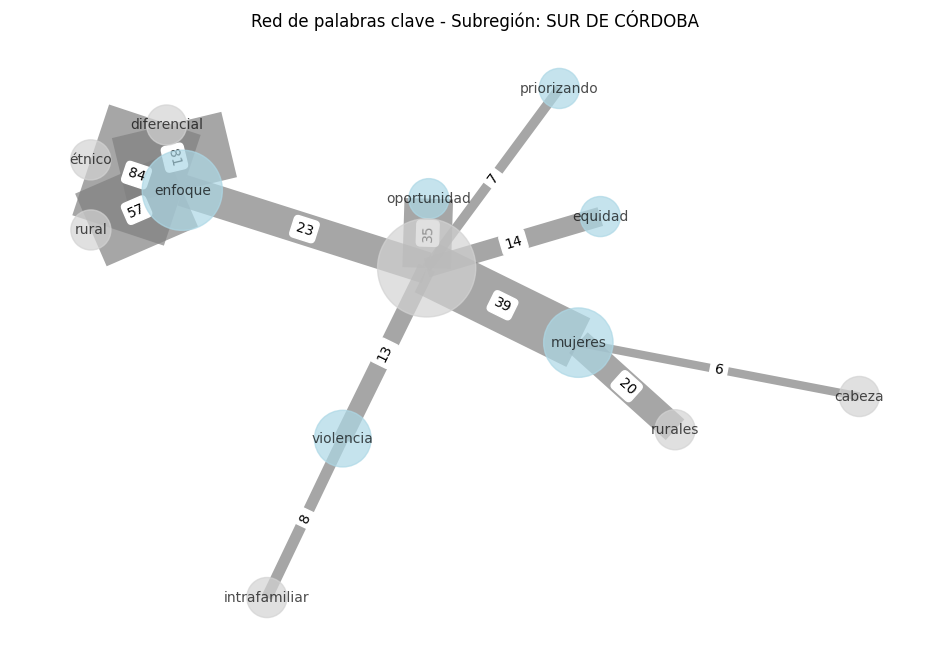

Nodo:  - Centralidad de grado: 0.5 - Centralidad de intermediación: 0.8484848484848485
Nodo: enfoque - Centralidad de grado: 0.3333333333333333 - Centralidad de intermediación: 0.4545454545454546
Nodo: mujeres - Centralidad de grado: 0.25 - Centralidad de intermediación: 0.3181818181818182
Nodo: violencia - Centralidad de grado: 0.16666666666666666 - Centralidad de intermediación: 0.16666666666666669
Nodo: priorizando - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: equidad - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: rural - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: étnico - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: diferencial - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0



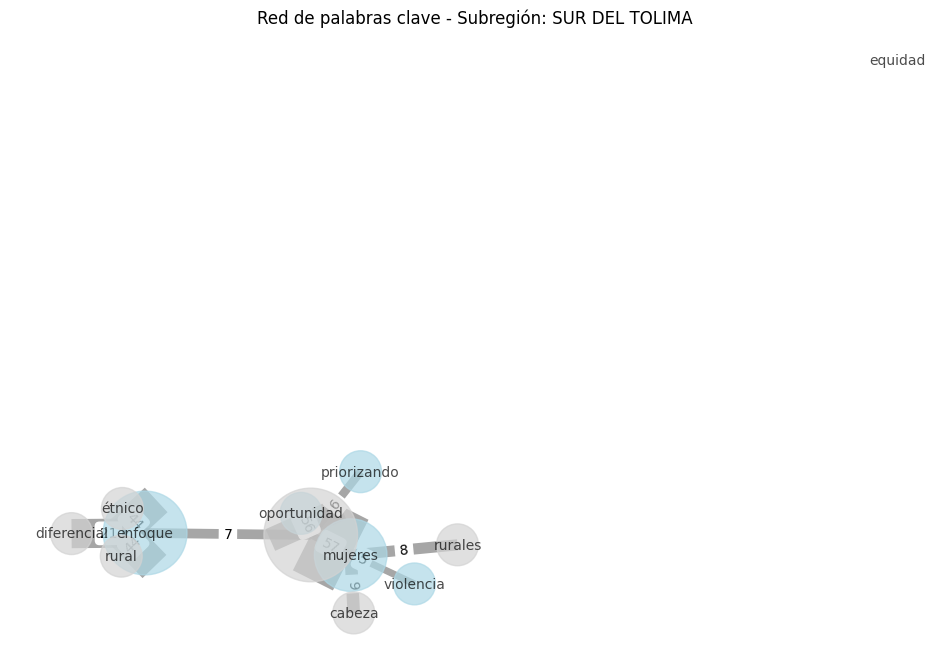

Nodo:  - Centralidad de grado: 0.4545454545454546 - Centralidad de intermediación: 0.6545454545454545
Nodo: enfoque - Centralidad de grado: 0.36363636363636365 - Centralidad de intermediación: 0.43636363636363634
Nodo: mujeres - Centralidad de grado: 0.2727272727272727 - Centralidad de intermediación: 0.3090909090909091
Nodo: priorizando - Centralidad de grado: 0.09090909090909091 - Centralidad de intermediación: 0.0
Nodo: violencia - Centralidad de grado: 0.09090909090909091 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.09090909090909091 - Centralidad de intermediación: 0.0
Nodo: cabeza - Centralidad de grado: 0.09090909090909091 - Centralidad de intermediación: 0.0
Nodo: rurales - Centralidad de grado: 0.09090909090909091 - Centralidad de intermediación: 0.0
Nodo: diferencial - Centralidad de grado: 0.09090909090909091 - Centralidad de intermediación: 0.0
Nodo: rural - Centralidad de grado: 0.09090909090909091 - Centralidad de intermediación: 0.0



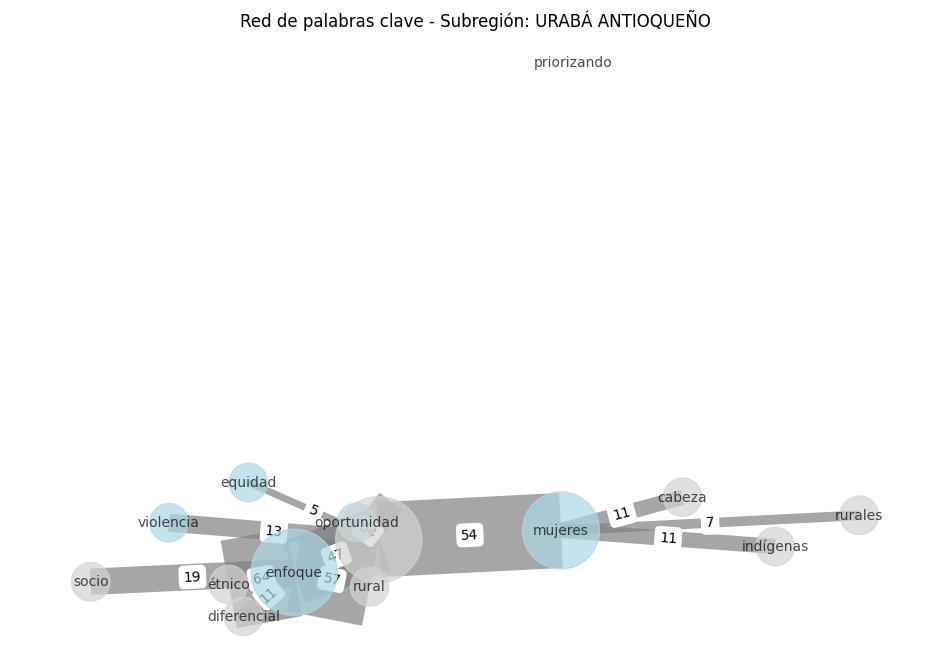

Nodo:  - Centralidad de grado: 0.38461538461538464 - Centralidad de intermediación: 0.641025641025641
Nodo: enfoque - Centralidad de grado: 0.38461538461538464 - Centralidad de intermediación: 0.48717948717948717
Nodo: mujeres - Centralidad de grado: 0.3076923076923077 - Centralidad de intermediación: 0.3846153846153846
Nodo: violencia - Centralidad de grado: 0.07692307692307693 - Centralidad de intermediación: 0.0
Nodo: equidad - Centralidad de grado: 0.07692307692307693 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.07692307692307693 - Centralidad de intermediación: 0.0
Nodo: rural - Centralidad de grado: 0.07692307692307693 - Centralidad de intermediación: 0.0
Nodo: étnico - Centralidad de grado: 0.07692307692307693 - Centralidad de intermediación: 0.0
Nodo: diferencial - Centralidad de grado: 0.07692307692307693 - Centralidad de intermediación: 0.0
Nodo: indígenas - Centralidad de grado: 0.07692307692307693 - Centralidad de intermediación: 0.0



In [54]:
import matplotlib.pyplot as plt

# Definir las palabras clave
keywords = ['priorizando', 'mujeres', 'violencia', 'enfoque', 'equidad', 'oportunidad']

# Iterar sobre cada subregión
for subregion in subregiones:
    # Obtener el texto limpio de la subregión
    textos_limpios_subregion = cleaned_texts[subregion]

    # Crear un grafo vacío
    G = nx.Graph()

    # Agregar los nodos al grafo con las palabras clave en el texto limpio
    G.add_nodes_from(keywords)

    # Obtener los bigramas en el texto limpio
    bigrams = list(ngrams(textos_limpios_subregion, 2))

    # Contar la frecuencia de los bigramas que contienen las palabras clave
    bigram_frequency = {}
    for bigram in bigrams:
        if any(keyword in bigram for keyword in keywords):
            bigram_frequency[bigram] = bigram_frequency.get(bigram, 0) + 1

    # Definir un umbral de frecuencia para filtrar los bigramas
    threshold = 5

    # Agregar los enlaces entre nodos para los bigramas que superen el umbral de frecuencia
    for bigram, frequency in bigram_frequency.items():
        if frequency >= threshold:
            G.add_edge(bigram[0], bigram[1], weight=frequency)

    # Obtener los nodos más relevantes según su grado y peso de conexión
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

    # Seleccionar los nodos más centrales para mostrar en el grafo
    most_central_nodes = sorted(degree_centrality, key=lambda x: (degree_centrality[x], betweenness_centrality[x]), reverse=True)[:10]

    # Ajustar los parámetros visuales del grafo
    node_size = [10000 * degree_centrality[node] for node in G.nodes]
    node_color = ['lightblue' if node in keywords else 'lightgray' for node in G.nodes]

    # Aumentar el tamaño de la figura
    plt.figure(figsize=(12, 8))

    # Visualizar el grafo
    pos = nx.spring_layout(G, seed=42)
    edges = G.edges()
    weights = [G[u][v]['weight'] for u, v in edges]
    labels = nx.get_edge_attributes(G, 'weight')

    nx.draw_networkx(G, pos, with_labels=True, node_size=node_size, node_color=node_color, font_size=10, edge_color='gray', width=weights, alpha=0.7)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.title(f'Red de palabras clave - Subregión: {subregion}')
    plt.axis('off')
    plt.show()

    # Mostrar los nodos más centrales
    for node in most_central_nodes:
        print("Nodo:", node, "- Centralidad de grado:", degree_centrality[node], "- Centralidad de intermediación:", betweenness_centrality[node])
    print()

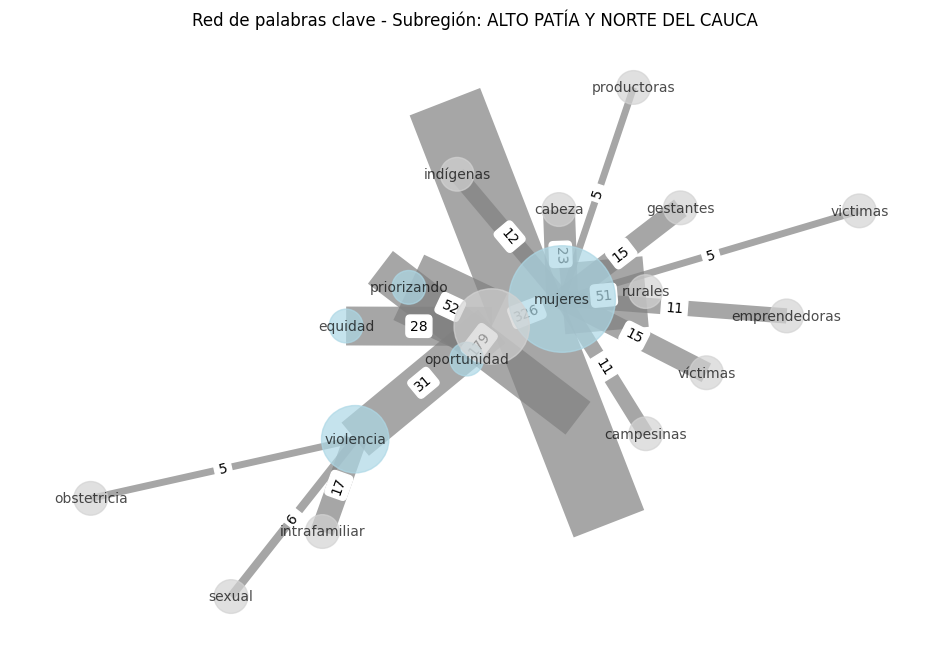

Nodo: mujeres - Centralidad de grado: 0.5882352941176471 - Centralidad de intermediación: 0.7941176470588235
Nodo:  - Centralidad de grado: 0.29411764705882354 - Centralidad de intermediación: 0.625
Nodo: violencia - Centralidad de grado: 0.23529411764705882 - Centralidad de intermediación: 0.33088235294117646
Nodo: priorizando - Centralidad de grado: 0.058823529411764705 - Centralidad de intermediación: 0.0
Nodo: equidad - Centralidad de grado: 0.058823529411764705 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.058823529411764705 - Centralidad de intermediación: 0.0
Nodo: intrafamiliar - Centralidad de grado: 0.058823529411764705 - Centralidad de intermediación: 0.0
Nodo: víctimas - Centralidad de grado: 0.058823529411764705 - Centralidad de intermediación: 0.0
Nodo: cabeza - Centralidad de grado: 0.058823529411764705 - Centralidad de intermediación: 0.0
Nodo: gestantes - Centralidad de grado: 0.058823529411764705 - Centralidad de intermediación: 0.0


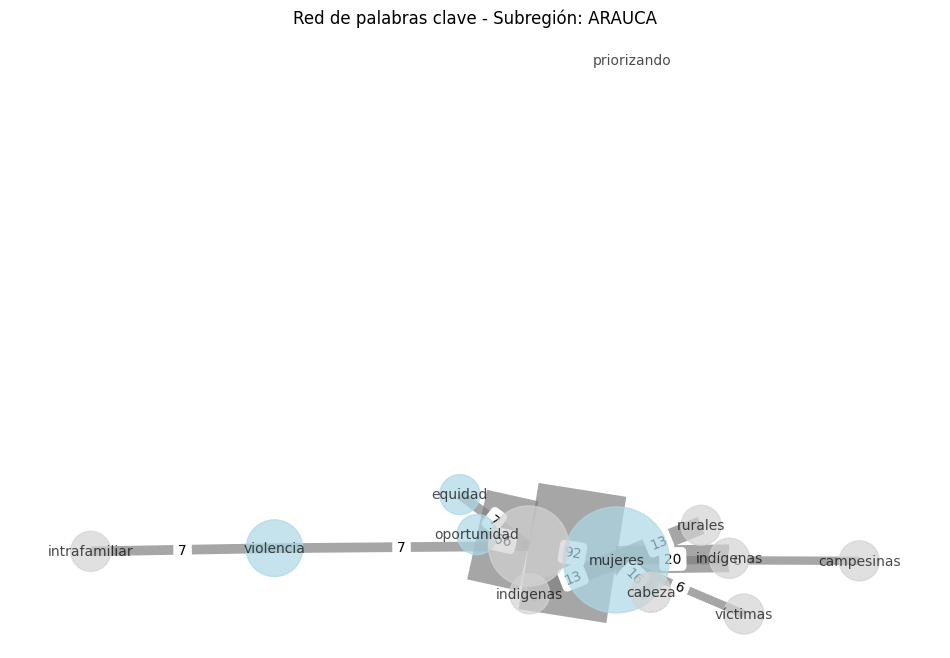

Nodo: mujeres - Centralidad de grado: 0.5833333333333333 - Centralidad de intermediación: 0.6818181818181819
Nodo:  - Centralidad de grado: 0.3333333333333333 - Centralidad de intermediación: 0.5
Nodo: violencia - Centralidad de grado: 0.16666666666666666 - Centralidad de intermediación: 0.15151515151515152
Nodo: equidad - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: indígenas - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: cabeza - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: rurales - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: campesinas - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: víctimas - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0



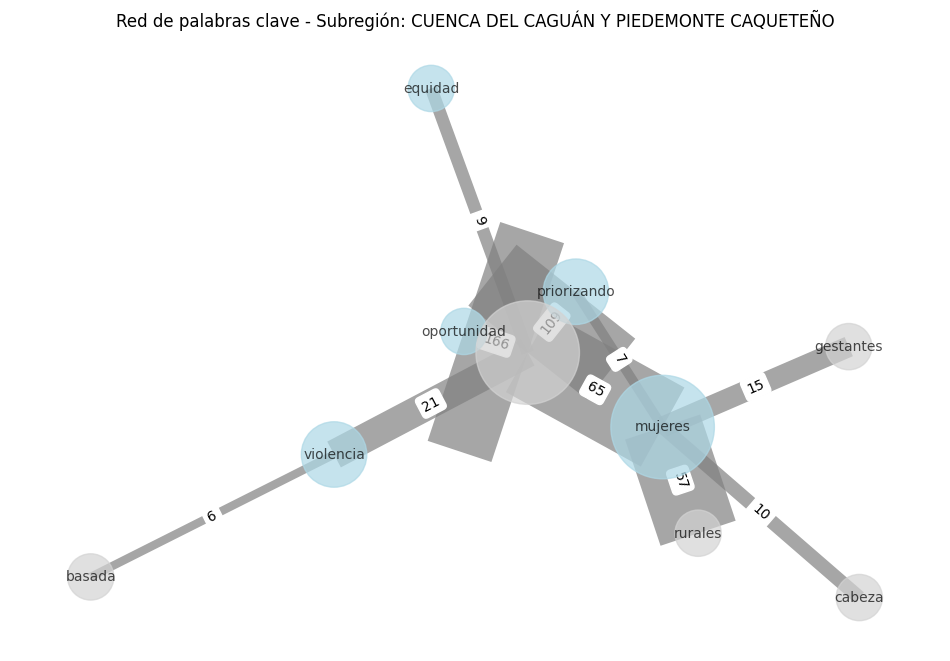

Nodo: mujeres - Centralidad de grado: 0.5555555555555556 - Centralidad de intermediación: 0.7222222222222222
Nodo:  - Centralidad de grado: 0.5555555555555556 - Centralidad de intermediación: 0.6944444444444444
Nodo: violencia - Centralidad de grado: 0.2222222222222222 - Centralidad de intermediación: 0.2222222222222222
Nodo: priorizando - Centralidad de grado: 0.2222222222222222 - Centralidad de intermediación: 0.0
Nodo: equidad - Centralidad de grado: 0.1111111111111111 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.1111111111111111 - Centralidad de intermediación: 0.0
Nodo: basada - Centralidad de grado: 0.1111111111111111 - Centralidad de intermediación: 0.0
Nodo: rurales - Centralidad de grado: 0.1111111111111111 - Centralidad de intermediación: 0.0
Nodo: gestantes - Centralidad de grado: 0.1111111111111111 - Centralidad de intermediación: 0.0
Nodo: cabeza - Centralidad de grado: 0.1111111111111111 - Centralidad de intermediación: 0.0



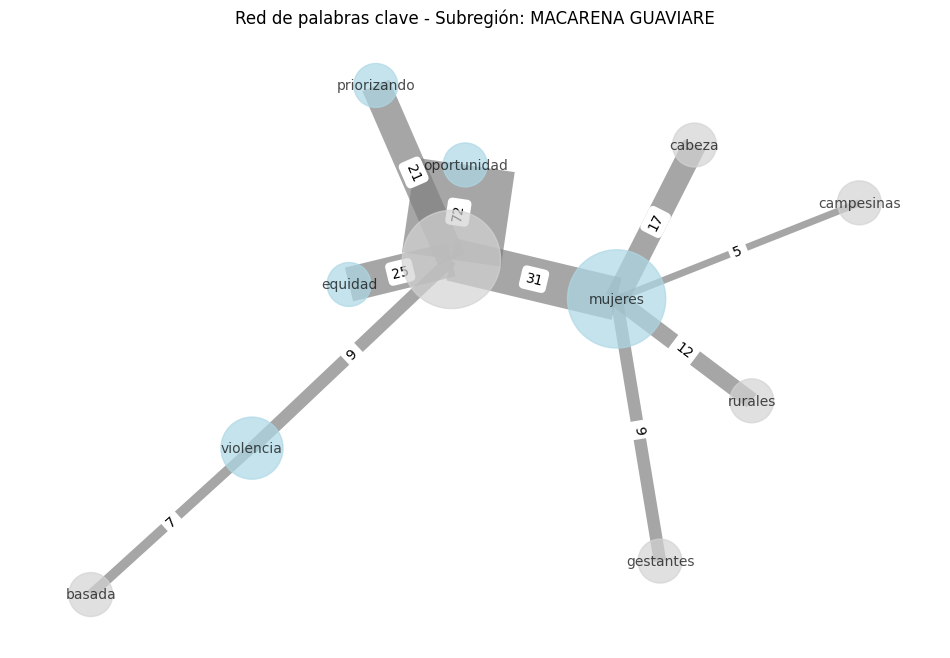

Nodo:  - Centralidad de grado: 0.5 - Centralidad de intermediación: 0.7555555555555555
Nodo: mujeres - Centralidad de grado: 0.5 - Centralidad de intermediación: 0.6666666666666667
Nodo: violencia - Centralidad de grado: 0.2 - Centralidad de intermediación: 0.2
Nodo: priorizando - Centralidad de grado: 0.1 - Centralidad de intermediación: 0.0
Nodo: equidad - Centralidad de grado: 0.1 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.1 - Centralidad de intermediación: 0.0
Nodo: cabeza - Centralidad de grado: 0.1 - Centralidad de intermediación: 0.0
Nodo: rurales - Centralidad de grado: 0.1 - Centralidad de intermediación: 0.0
Nodo: gestantes - Centralidad de grado: 0.1 - Centralidad de intermediación: 0.0
Nodo: campesinas - Centralidad de grado: 0.1 - Centralidad de intermediación: 0.0



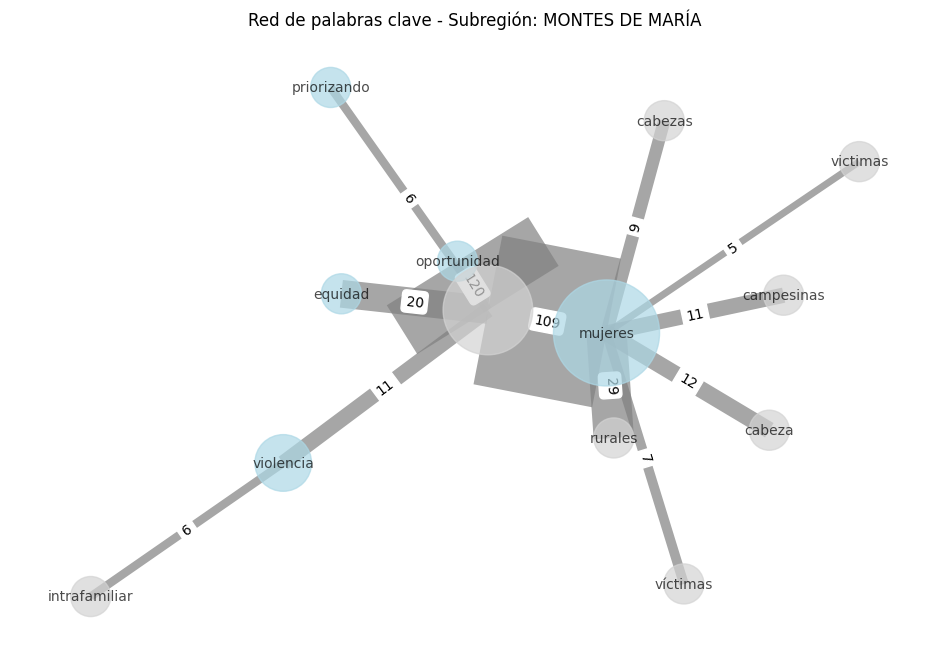

Nodo: mujeres - Centralidad de grado: 0.5833333333333333 - Centralidad de intermediación: 0.7727272727272727
Nodo:  - Centralidad de grado: 0.41666666666666663 - Centralidad de intermediación: 0.6666666666666667
Nodo: violencia - Centralidad de grado: 0.16666666666666666 - Centralidad de intermediación: 0.16666666666666669
Nodo: priorizando - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: equidad - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: intrafamiliar - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: rurales - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: cabezas - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: campesinas - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediació

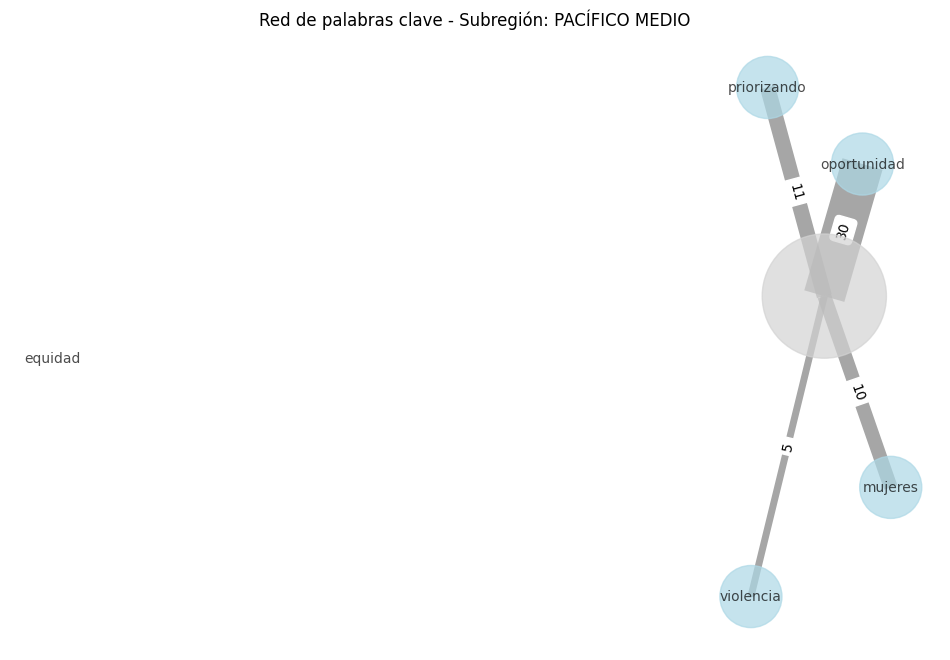

Nodo:  - Centralidad de grado: 0.8 - Centralidad de intermediación: 0.6000000000000001
Nodo: priorizando - Centralidad de grado: 0.2 - Centralidad de intermediación: 0.0
Nodo: mujeres - Centralidad de grado: 0.2 - Centralidad de intermediación: 0.0
Nodo: violencia - Centralidad de grado: 0.2 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.2 - Centralidad de intermediación: 0.0
Nodo: equidad - Centralidad de grado: 0.0 - Centralidad de intermediación: 0.0



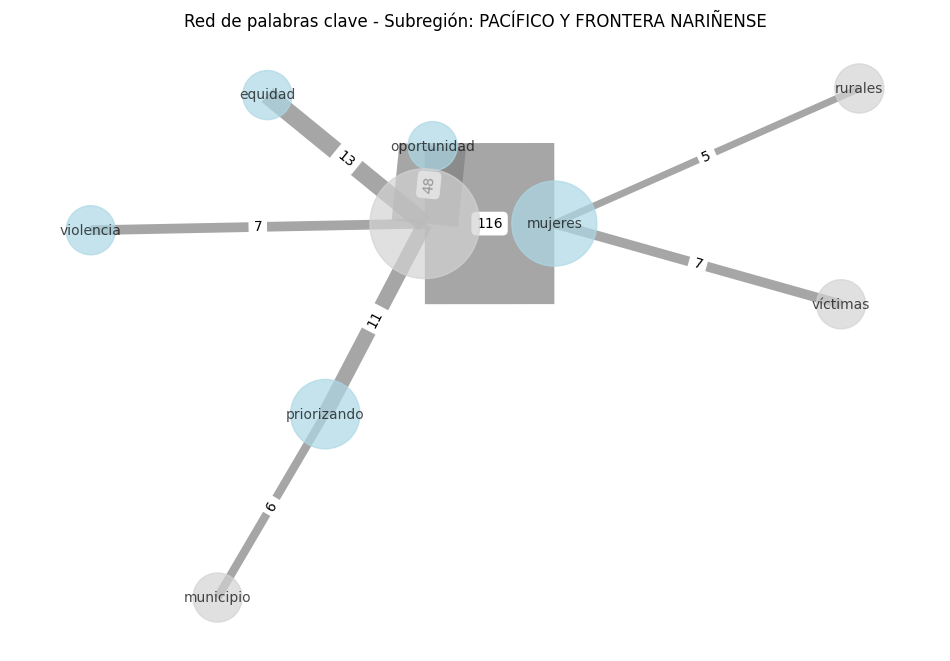

Nodo:  - Centralidad de grado: 0.625 - Centralidad de intermediación: 0.8571428571428571
Nodo: mujeres - Centralidad de grado: 0.375 - Centralidad de intermediación: 0.46428571428571425
Nodo: priorizando - Centralidad de grado: 0.25 - Centralidad de intermediación: 0.25
Nodo: violencia - Centralidad de grado: 0.125 - Centralidad de intermediación: 0.0
Nodo: equidad - Centralidad de grado: 0.125 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.125 - Centralidad de intermediación: 0.0
Nodo: rurales - Centralidad de grado: 0.125 - Centralidad de intermediación: 0.0
Nodo: municipio - Centralidad de grado: 0.125 - Centralidad de intermediación: 0.0
Nodo: víctimas - Centralidad de grado: 0.125 - Centralidad de intermediación: 0.0



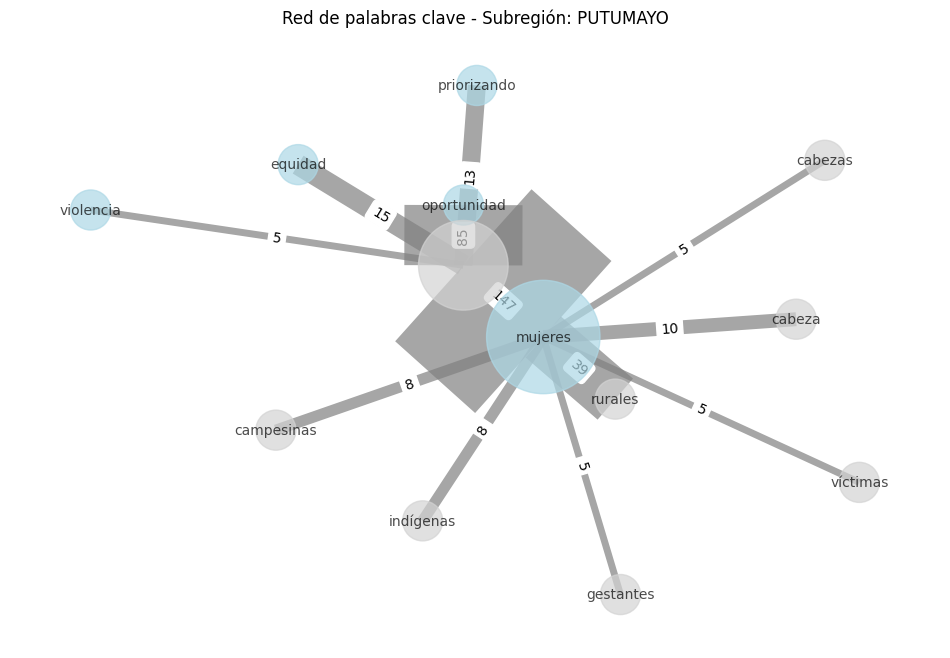

Nodo: mujeres - Centralidad de grado: 0.6666666666666666 - Centralidad de intermediación: 0.8484848484848485
Nodo:  - Centralidad de grado: 0.41666666666666663 - Centralidad de intermediación: 0.5757575757575758
Nodo: priorizando - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: violencia - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: equidad - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: rurales - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: gestantes - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: campesinas - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0
Nodo: cabeza - Centralidad de grado: 0.08333333333333333 - Centralidad de intermediación: 0.0



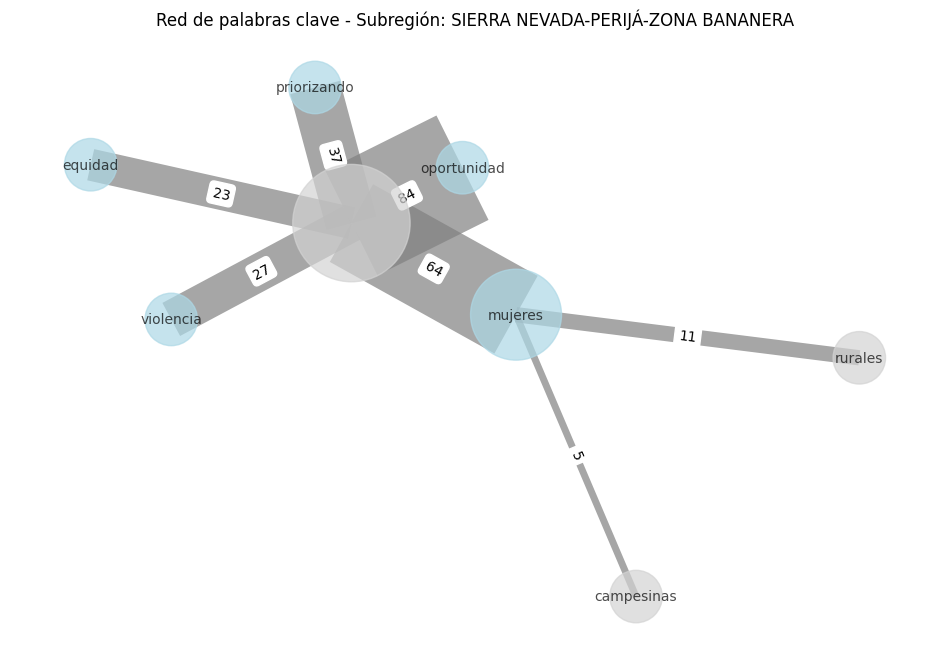

Nodo:  - Centralidad de grado: 0.7142857142857142 - Centralidad de intermediación: 0.8571428571428571
Nodo: mujeres - Centralidad de grado: 0.42857142857142855 - Centralidad de intermediación: 0.5238095238095237
Nodo: priorizando - Centralidad de grado: 0.14285714285714285 - Centralidad de intermediación: 0.0
Nodo: violencia - Centralidad de grado: 0.14285714285714285 - Centralidad de intermediación: 0.0
Nodo: equidad - Centralidad de grado: 0.14285714285714285 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.14285714285714285 - Centralidad de intermediación: 0.0
Nodo: rurales - Centralidad de grado: 0.14285714285714285 - Centralidad de intermediación: 0.0
Nodo: campesinas - Centralidad de grado: 0.14285714285714285 - Centralidad de intermediación: 0.0



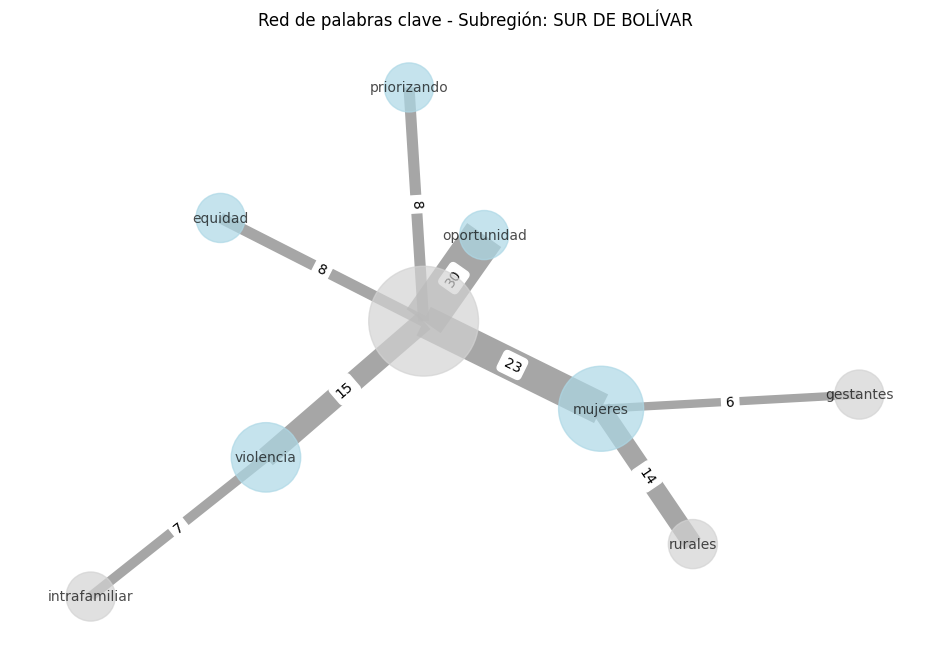

Nodo:  - Centralidad de grado: 0.625 - Centralidad de intermediación: 0.8571428571428571
Nodo: mujeres - Centralidad de grado: 0.375 - Centralidad de intermediación: 0.46428571428571425
Nodo: violencia - Centralidad de grado: 0.25 - Centralidad de intermediación: 0.25
Nodo: priorizando - Centralidad de grado: 0.125 - Centralidad de intermediación: 0.0
Nodo: equidad - Centralidad de grado: 0.125 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.125 - Centralidad de intermediación: 0.0
Nodo: gestantes - Centralidad de grado: 0.125 - Centralidad de intermediación: 0.0
Nodo: rurales - Centralidad de grado: 0.125 - Centralidad de intermediación: 0.0
Nodo: intrafamiliar - Centralidad de grado: 0.125 - Centralidad de intermediación: 0.0



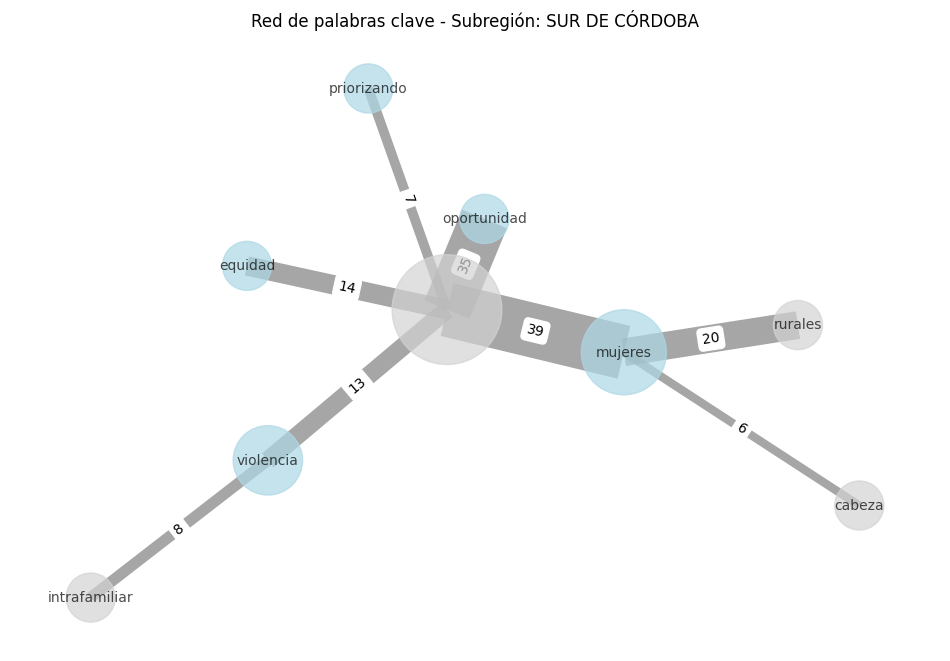

Nodo:  - Centralidad de grado: 0.625 - Centralidad de intermediación: 0.8571428571428571
Nodo: mujeres - Centralidad de grado: 0.375 - Centralidad de intermediación: 0.46428571428571425
Nodo: violencia - Centralidad de grado: 0.25 - Centralidad de intermediación: 0.25
Nodo: priorizando - Centralidad de grado: 0.125 - Centralidad de intermediación: 0.0
Nodo: equidad - Centralidad de grado: 0.125 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.125 - Centralidad de intermediación: 0.0
Nodo: rurales - Centralidad de grado: 0.125 - Centralidad de intermediación: 0.0
Nodo: intrafamiliar - Centralidad de grado: 0.125 - Centralidad de intermediación: 0.0
Nodo: cabeza - Centralidad de grado: 0.125 - Centralidad de intermediación: 0.0



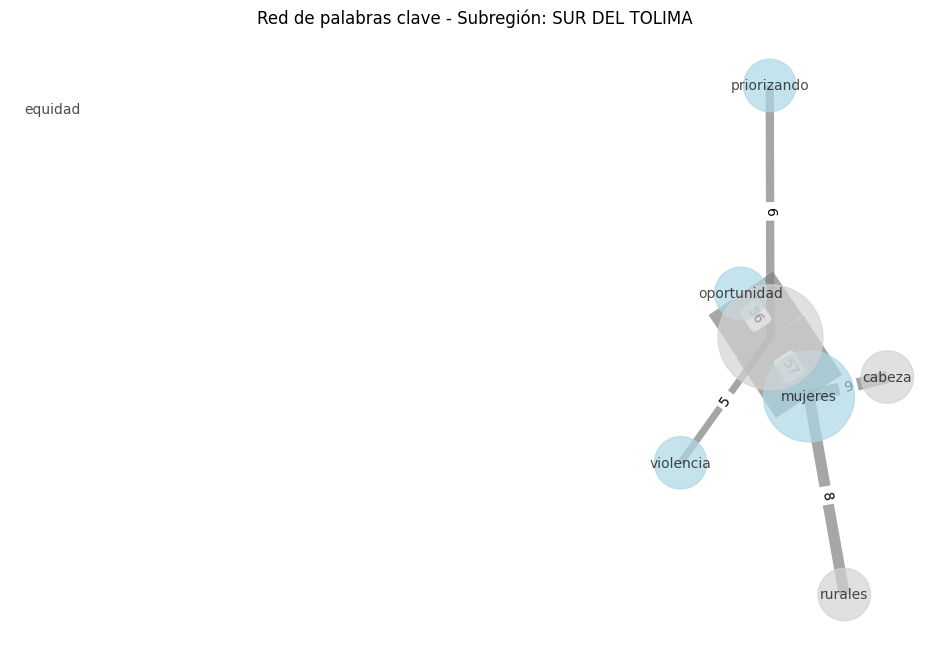

Nodo:  - Centralidad de grado: 0.5714285714285714 - Centralidad de intermediación: 0.5714285714285714
Nodo: mujeres - Centralidad de grado: 0.42857142857142855 - Centralidad de intermediación: 0.42857142857142855
Nodo: priorizando - Centralidad de grado: 0.14285714285714285 - Centralidad de intermediación: 0.0
Nodo: violencia - Centralidad de grado: 0.14285714285714285 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.14285714285714285 - Centralidad de intermediación: 0.0
Nodo: cabeza - Centralidad de grado: 0.14285714285714285 - Centralidad de intermediación: 0.0
Nodo: rurales - Centralidad de grado: 0.14285714285714285 - Centralidad de intermediación: 0.0
Nodo: equidad - Centralidad de grado: 0.0 - Centralidad de intermediación: 0.0



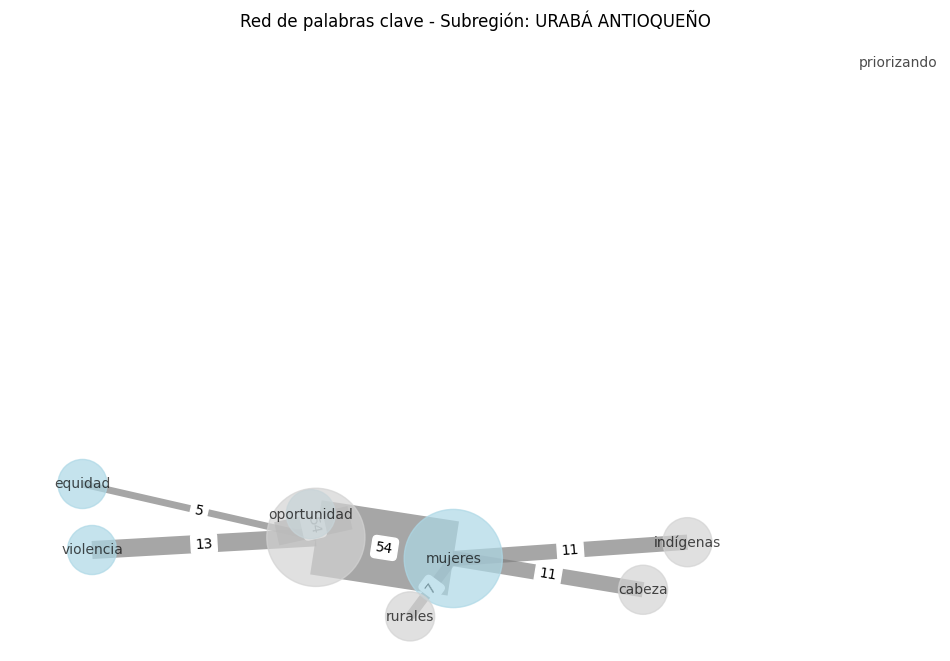

Nodo: mujeres - Centralidad de grado: 0.5 - Centralidad de intermediación: 0.5357142857142857
Nodo:  - Centralidad de grado: 0.5 - Centralidad de intermediación: 0.5357142857142857
Nodo: violencia - Centralidad de grado: 0.125 - Centralidad de intermediación: 0.0
Nodo: equidad - Centralidad de grado: 0.125 - Centralidad de intermediación: 0.0
Nodo: oportunidad - Centralidad de grado: 0.125 - Centralidad de intermediación: 0.0
Nodo: indígenas - Centralidad de grado: 0.125 - Centralidad de intermediación: 0.0
Nodo: rurales - Centralidad de grado: 0.125 - Centralidad de intermediación: 0.0
Nodo: cabeza - Centralidad de grado: 0.125 - Centralidad de intermediación: 0.0
Nodo: priorizando - Centralidad de grado: 0.0 - Centralidad de intermediación: 0.0



In [59]:
import matplotlib.pyplot as plt

# Definir las palabras clave
keywords = ['priorizando', 'mujeres', 'violencia', 'equidad', 'oportunidad']

# Iterar sobre cada subregión
for subregion in subregiones:
    # Obtener el texto limpio de la subregión
    textos_limpios_subregion = cleaned_texts[subregion]

    # Crear un grafo vacío
    G = nx.Graph()

    # Agregar los nodos al grafo con las palabras clave en el texto limpio
    G.add_nodes_from(keywords)

    # Obtener los bigramas en el texto limpio
    bigrams = list(ngrams(textos_limpios_subregion, 2))

    # Contar la frecuencia de los bigramas que contienen las palabras clave
    bigram_frequency = {}
    for bigram in bigrams:
        if any(keyword in bigram for keyword in keywords):
            bigram_frequency[bigram] = bigram_frequency.get(bigram, 0) + 1

    # Definir un umbral de frecuencia para filtrar los bigramas
    threshold = 5

    # Agregar los enlaces entre nodos para los bigramas que superen el umbral de frecuencia
    for bigram, frequency in bigram_frequency.items():
        if frequency >= threshold:
            G.add_edge(bigram[0], bigram[1], weight=frequency)

    # Obtener los nodos más relevantes según su grado y peso de conexión
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

    # Seleccionar los nodos más centrales para mostrar en el grafo
    most_central_nodes = sorted(degree_centrality, key=lambda x: (degree_centrality[x], betweenness_centrality[x]), reverse=True)[:10]

    # Ajustar los parámetros visuales del grafo
    node_size = [10000 * degree_centrality[node] for node in G.nodes]
    node_color = ['lightblue' if node in keywords else 'lightgray' for node in G.nodes]

    # Aumentar el tamaño de la figura
    plt.figure(figsize=(12, 8))

    # Visualizar el grafo
    pos = nx.spring_layout(G, seed=42)
    edges = G.edges()
    weights = [G[u][v]['weight'] for u, v in edges]
    labels = nx.get_edge_attributes(G, 'weight')

    nx.draw_networkx(G, pos, with_labels=True, node_size=node_size, node_color=node_color, font_size=10, edge_color='gray', width=weights, alpha=0.7)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.title(f'Red de palabras clave - Subregión: {subregion}')
    plt.axis('off')
    plt.show()

    # Mostrar los nodos más centrales
    for node in most_central_nodes:
        print("Nodo:", node, "- Centralidad de grado:", degree_centrality[node], "- Centralidad de intermediación:", betweenness_centrality[node])
    print()

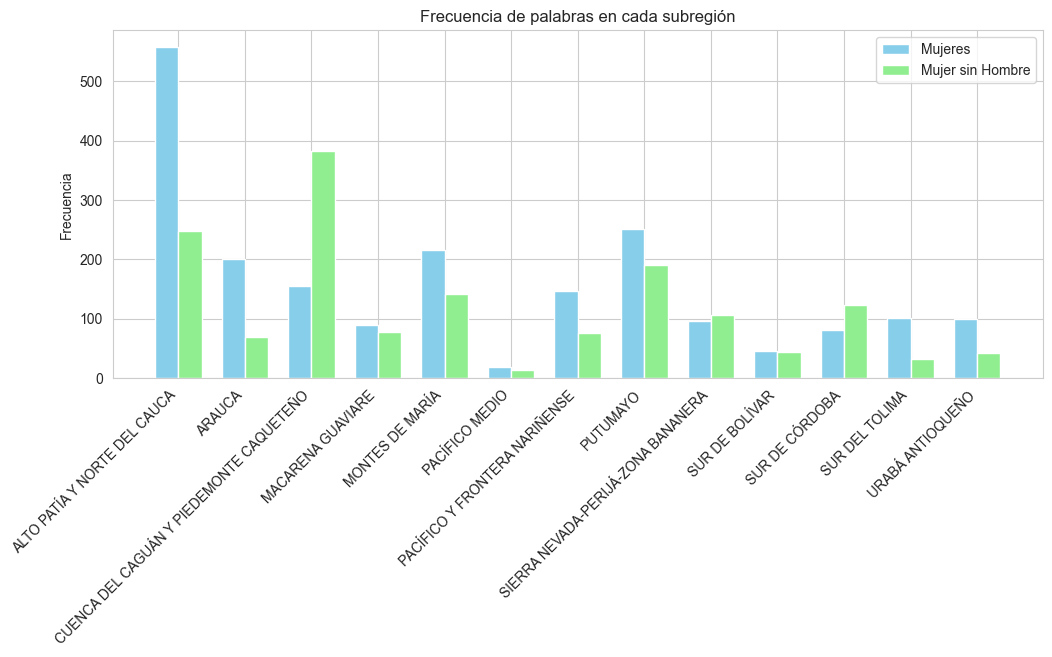